# Hyperparameter Optimization (HPO) of Machine Learning Models
L. Yang and A. Shami, “On hyperparameter optimization of machine learning algorithms: Theory and practice,” Neurocomputing, vol. 415, pp. 295–316, 2020, doi: https://doi.org/10.1016/j.neucom.2020.07.061.

### **Sample code for regression problems**  
**Dataset used:**  
&nbsp; Boson Housing dataset from sklearn

**Machine learning algorithms used:**  
&nbsp; Random forest (RF), support vector machine (SVM), k-nearest neighbor (KNN), artificial neural network (ANN)

**HPO algorithms used:**  
&nbsp; Grid search, random search, hyperband, Bayesian Optimization with Gaussian Processes (BO-GP), Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE), particle swarm optimization (PSO), genetic algorithm (GA).

**Performance metric:**  
&nbsp; Mean square error (MSE)

In [1]:
import os

def install_packages(packages):
    for package in packages:
        !pip install -q {package}

packages_to_install = [
    "tensorflow~=2.11",
    "scikeras",
    "keras",
    "seaborn",
    "Optunity",
    "sklearn-deap",
    "colorama",
    "scikit-optimize",
    "hyperopt",
    "tpot",
    "ipykernel",
    "jupyter",
    "scikeras[tensorflow]",
]

install_packages(packages_to_install)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 56.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
import optunity
import optunity.metrics
import keras
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from random import randrange as sp_randrange
from sklearn.neural_network import MLPRegressor
from scipy.stats import entropy, skew, kurtosis
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, hp, tpe, STATUS_OK, space_eval
from scipy.stats import uniform

## Load Boston Housing dataset
We will take the Housing dataset which contains information about different houses in Boston. There are 506 samples and 13 feature variables in this Boston dataset. The main goal is to predict the value of prices of the house using the given features.

You can read more about the data and the variables [[1]](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [3]:
url = "https://faculty.tuck.dartmouth.edu/images/uploads/faculty/business-analytics/Boston_Housing.xlsx"
df = pd.read_excel(url)
print(df.head())
X = df.iloc[:,0:13].values  # Caratteristiche
y = df.iloc[:,13].values  # Target (MEDV is the Median value of owner-occupied homes in $1000's)
# Imposta l'opzione di stampa per visualizzare tutte le righe e colonne di numpy array
#np.set_printoptions(threshold=np.inf)
print("\n")
print("Features (X):")
print(X[:5]) #shows only the first 5 rows
print("\nTarget (y):")
print(y[:5]) #shows only the first 5 rows
df

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Features (X):
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


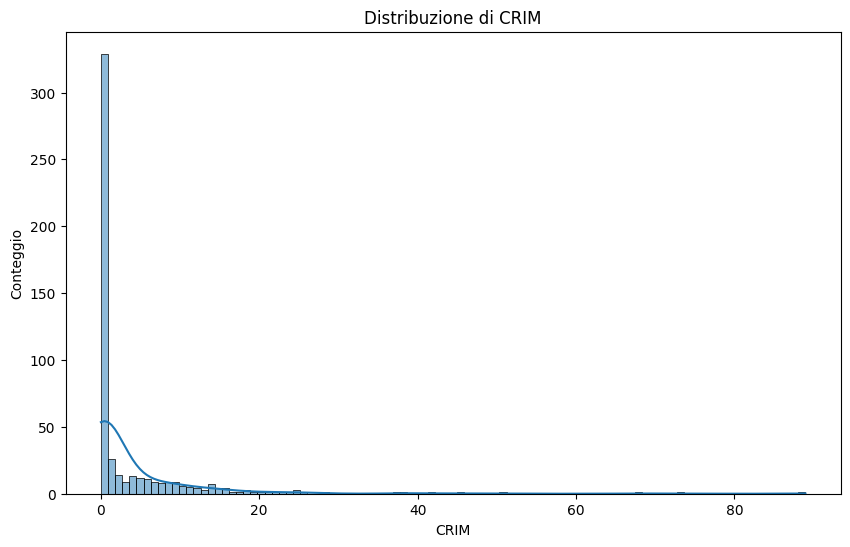

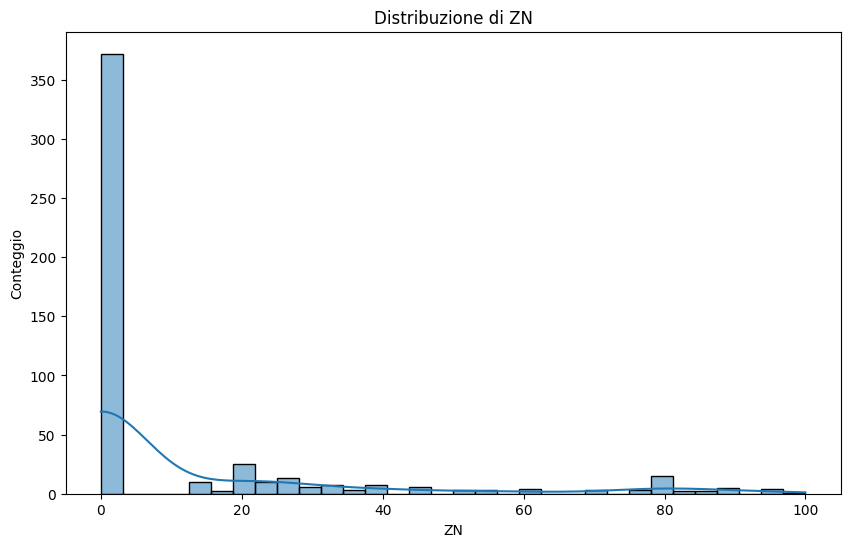

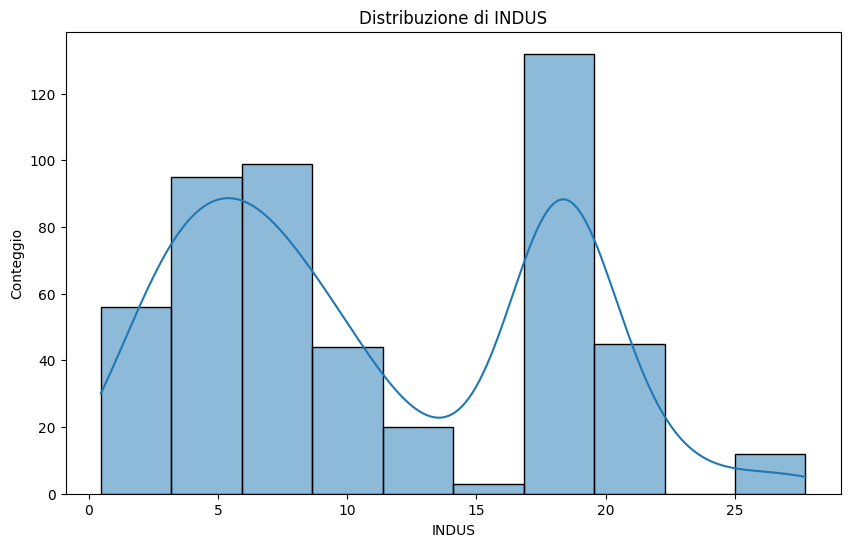

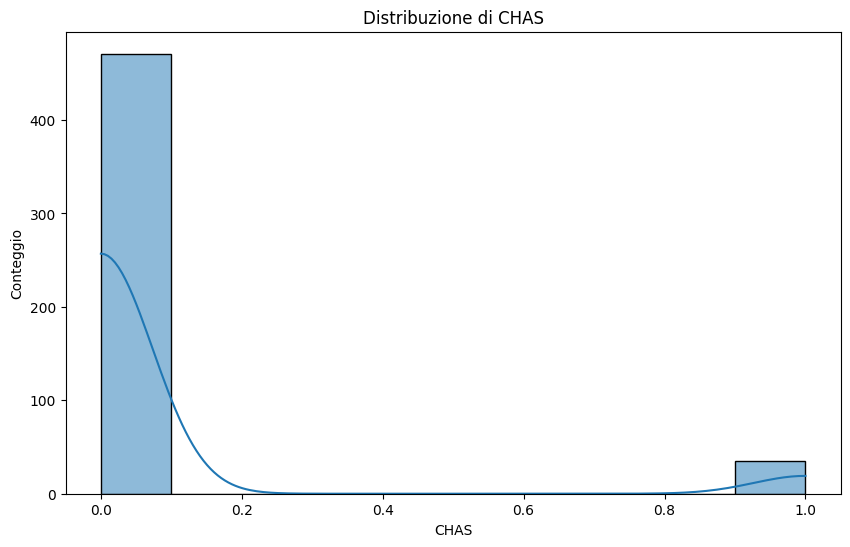

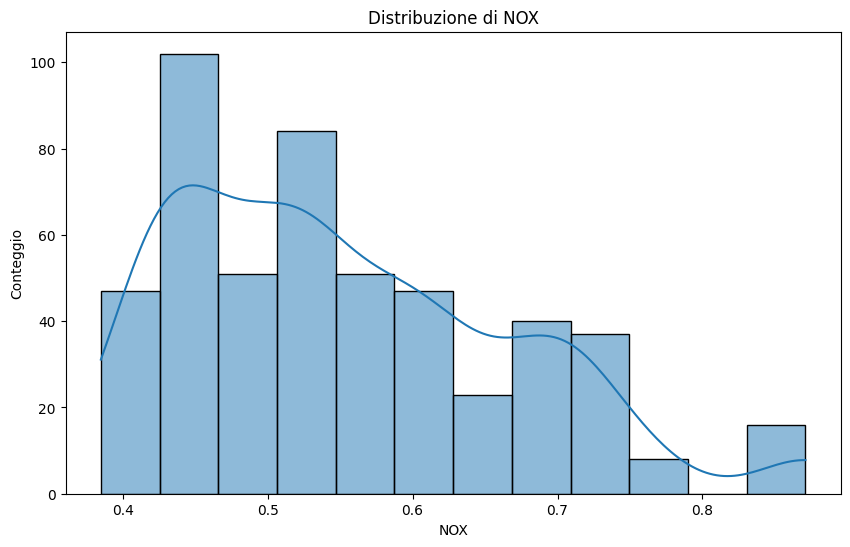

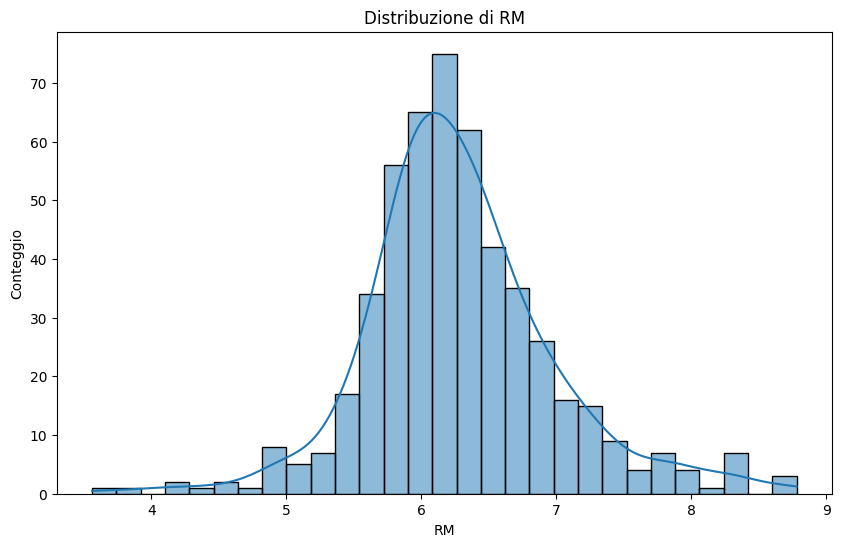

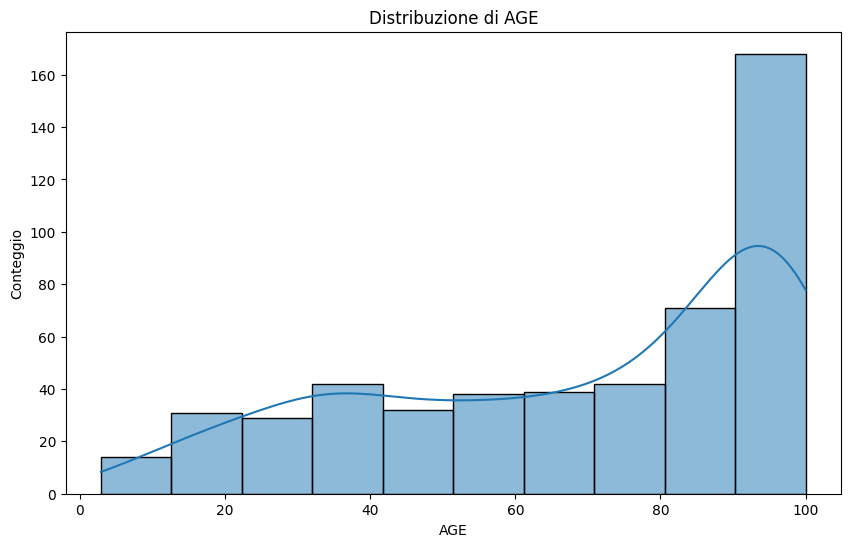

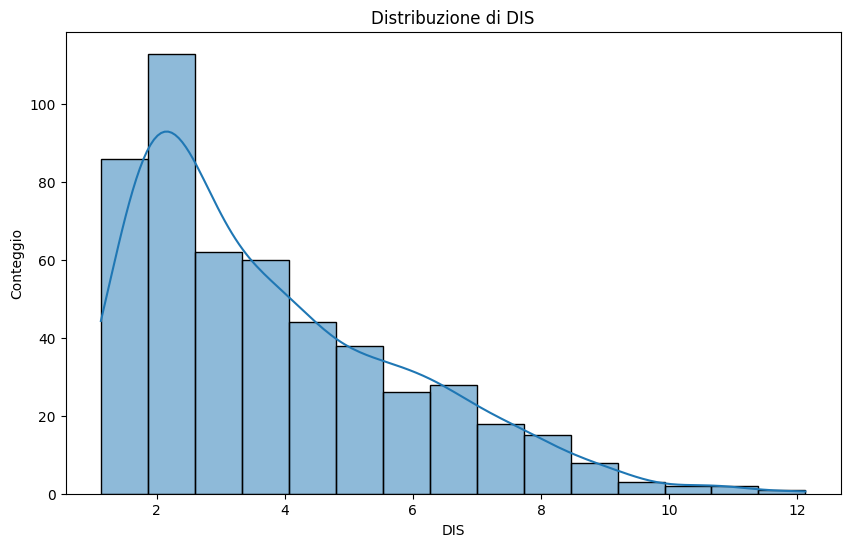

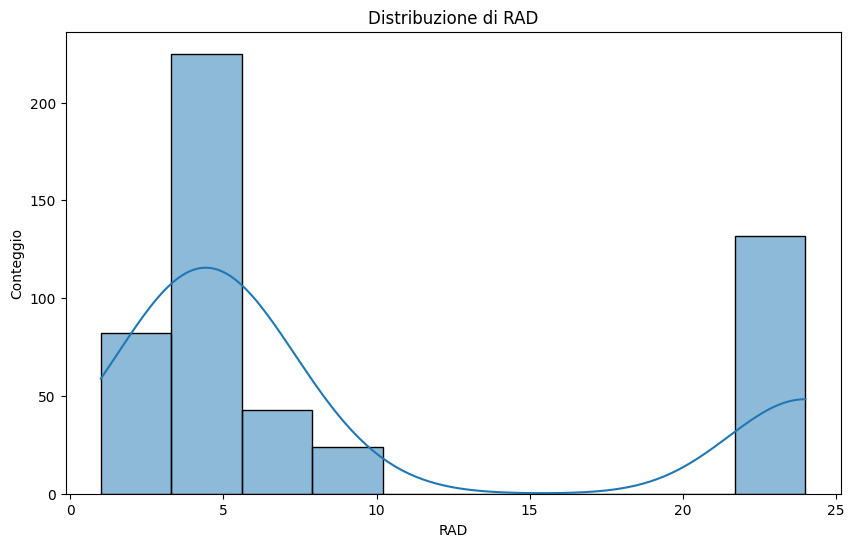

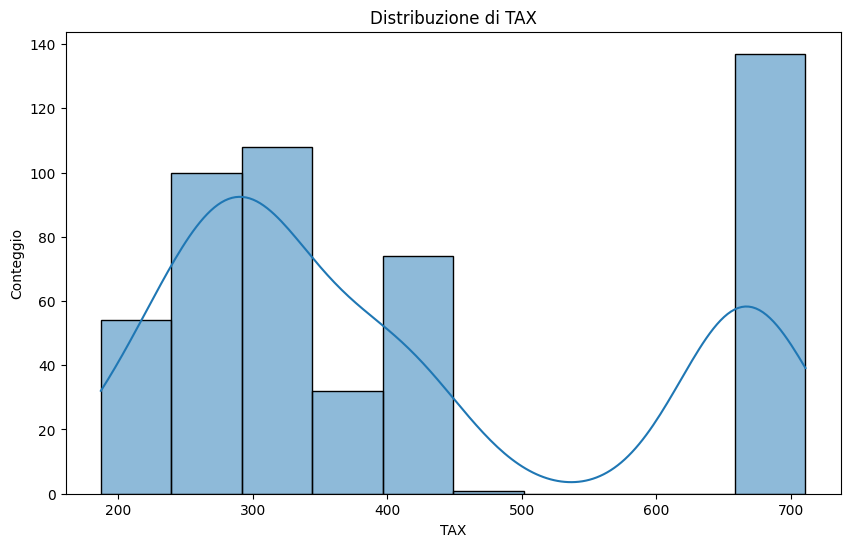

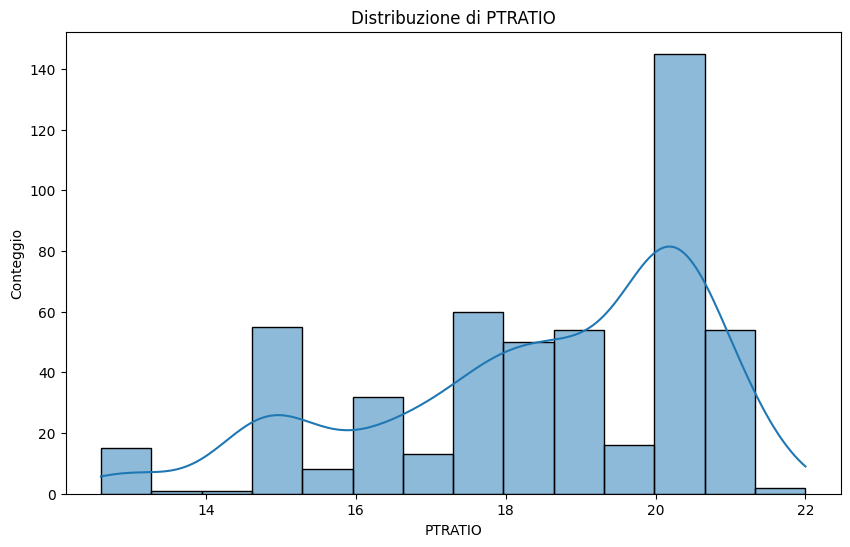

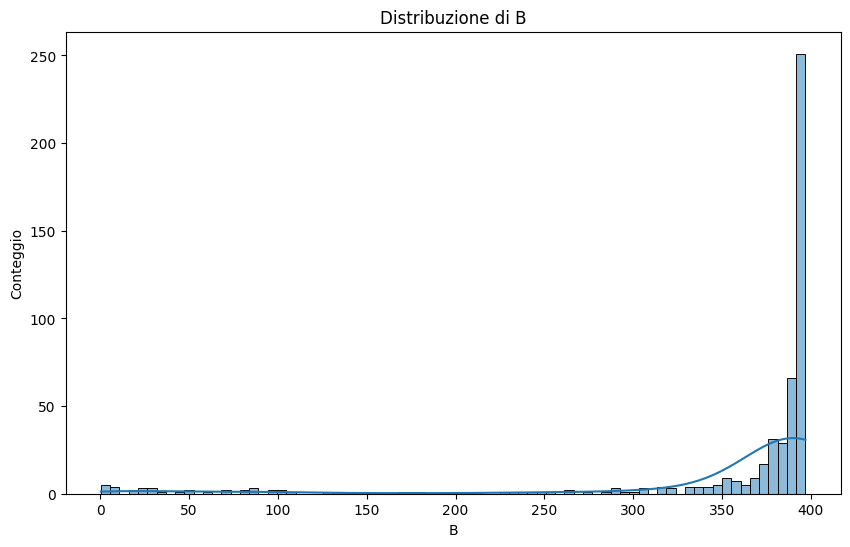

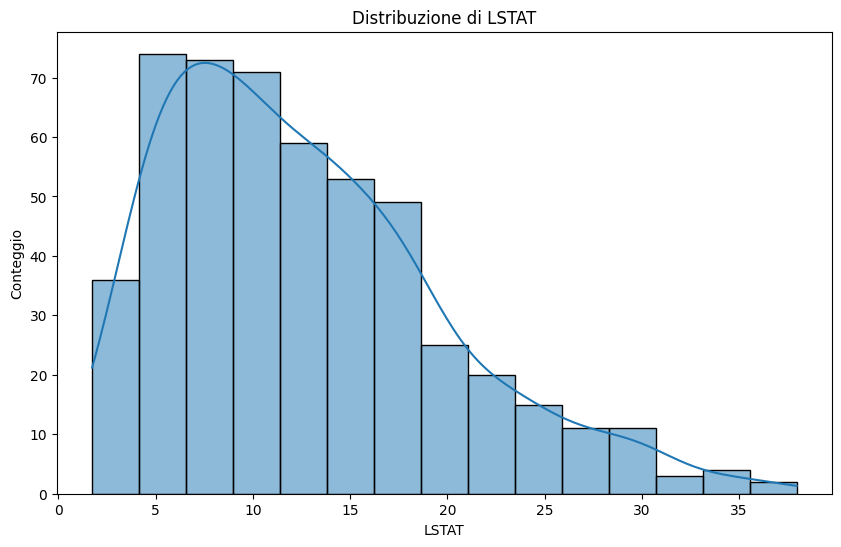


Legenda per l'interpretazione degli indici:
# Una skewness vicina a 0 indica una distribuzione simmetrica, mentre valori più alti indicano sbilanciamento.
# Interpretazione della Skewness:
# Skewness = 0: Distribuzione perfettamente simmetrica.
# Skewness > 0: Distribuzione con una coda lunga verso destra (sbilanciata a destra).
# Skewness < 0: Distribuzione con una coda lunga verso sinistra (sbilanciata a sinistra).
# Valori superiori a |1| sono considerati altamente asimmetrici.
# Interpretazione della Kurtosis:
# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).
# Kurtosis > 3: Distribuzione con code più pronunciate rispetto alla normale (leptocurtica).
# Kurtosis < 3: Distribuzione con code meno pronunciate rispetto alla normale (platicurtica).
# CV < 10%: I dati sono poco dispersi, distribuzione molto bilanciata.
# 10% ≤ CV ≤ 20%: I dati hanno una dispersione moderata, leggera variazione.
# 20% ≤ CV ≤ 50%: Dispersione moderata, la distribuzione è leggermente sbilanciata.
# CV > 

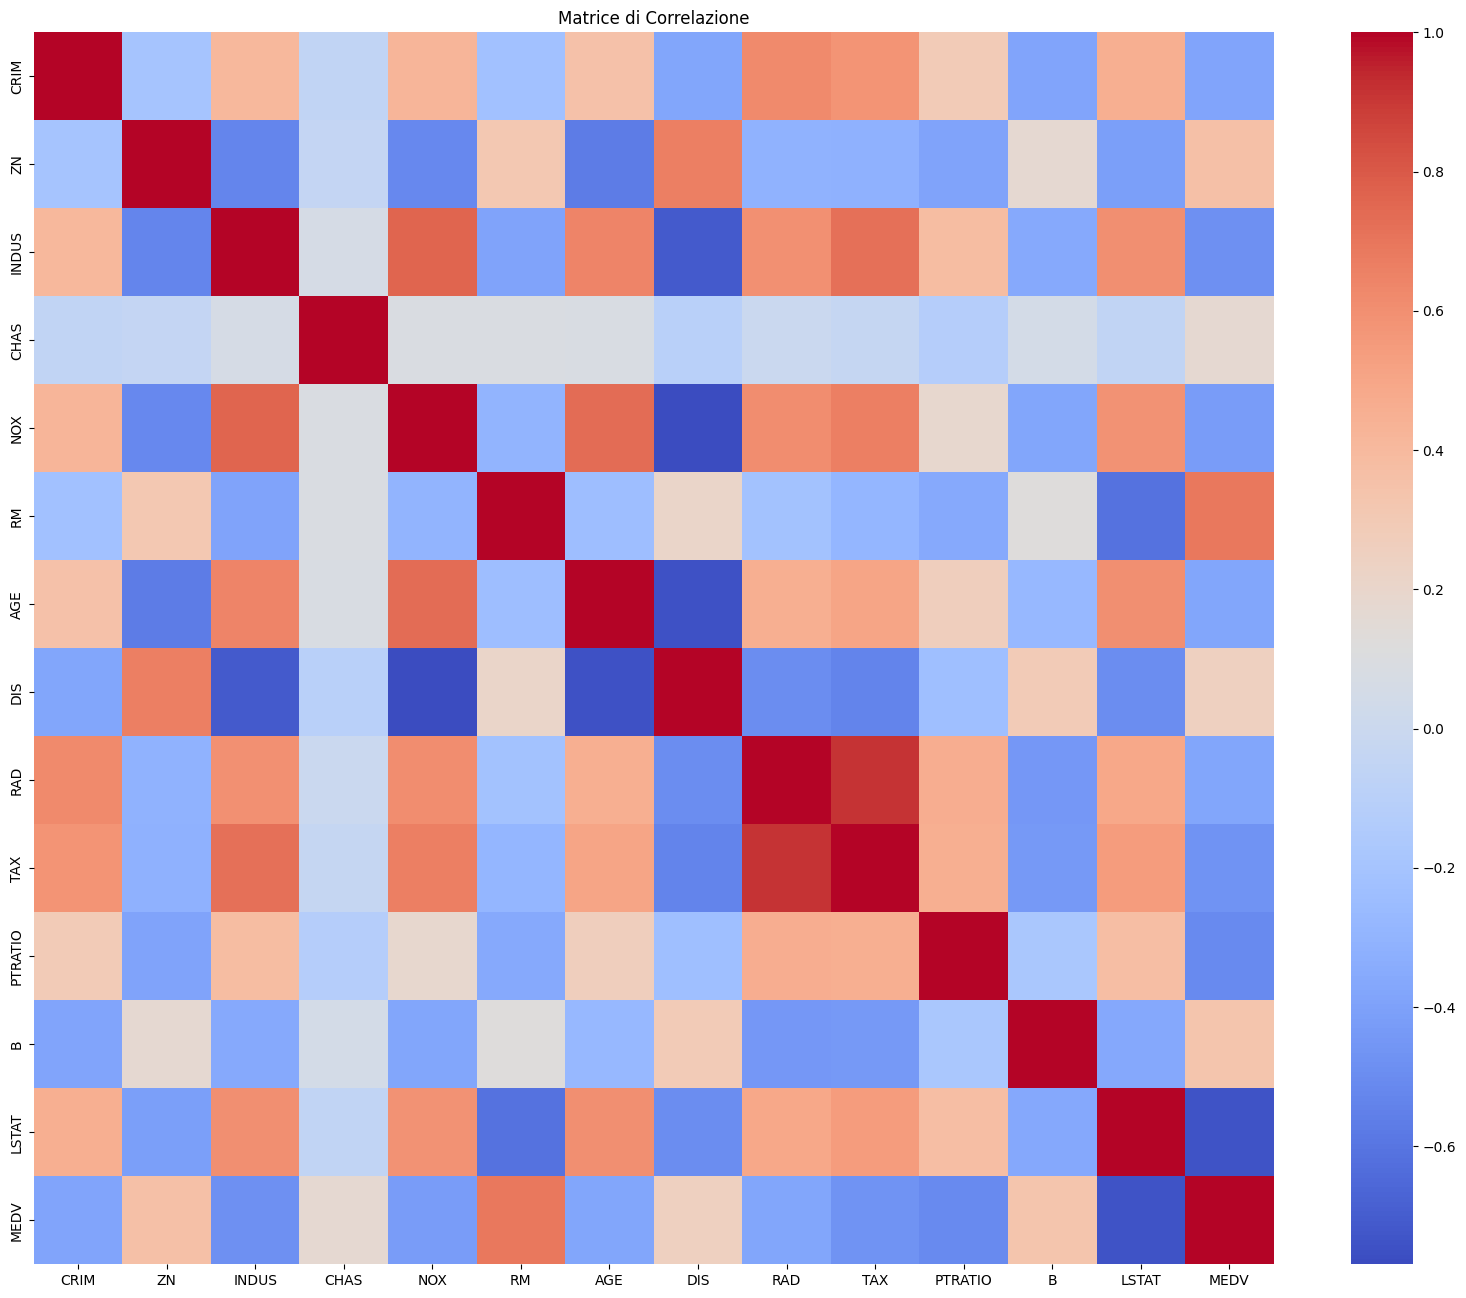

In [4]:
# Funzioni di analisi
def plot_numerical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.xlabel(column)
    plt.ylabel('Conteggio')
    plt.show()

def calculate_gini(array):
    array = np.sort(array)
    index = np.arange(1, len(array) + 1)
    n = len(array)
    if np.sum(array) == 0:
        return np.nan  # Evita divisioni per zero
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

def calculate_cv(array):
    mean = np.mean(array)
    if mean == 0:
        return np.nan  # Evita divisioni per zero
    return np.std(array) / mean * 100

# Calcolo degli indici per le variabili numeriche
numerical_columns = df.columns[:-1]  # Tutte le colonne tranne l'ultima (target)
summary_stats = {}

for col in numerical_columns:
    data = df[col].dropna().values
    if len(data) > 0:
        summary_stats[col] = {
            'Gini': calculate_gini(data),
            'Kurtosis': kurtosis(data, nan_policy='omit'),
            'Skewness': skew(data, nan_policy='omit'),
            'CV (%)': calculate_cv(data)
        }
        plot_numerical_distribution(df, col)

# Creazione della tabella riassuntiva
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
summary_df = summary_df.sort_values('Gini', ascending=False)

# Legenda per l'interpretazione
print("\nLegenda per l'interpretazione degli indici:")
print("# Una skewness vicina a 0 indica una distribuzione simmetrica, mentre valori più alti indicano sbilanciamento.")
print("# Interpretazione della Skewness:")
print("# Skewness = 0: Distribuzione perfettamente simmetrica.")
print("# Skewness > 0: Distribuzione con una coda lunga verso destra (sbilanciata a destra).")
print("# Skewness < 0: Distribuzione con una coda lunga verso sinistra (sbilanciata a sinistra).")
print("# Valori superiori a |1| sono considerati altamente asimmetrici.")
print("# Interpretazione della Kurtosis:")
print("# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).")
print("# Kurtosis > 3: Distribuzione con code più pronunciate rispetto alla normale (leptocurtica).")
print("# Kurtosis < 3: Distribuzione con code meno pronunciate rispetto alla normale (platicurtica).")
print("# CV < 10%: I dati sono poco dispersi, distribuzione molto bilanciata.")
print("# 10% ≤ CV ≤ 20%: I dati hanno una dispersione moderata, leggera variazione.")
print("# 20% ≤ CV ≤ 50%: Dispersione moderata, la distribuzione è leggermente sbilanciata.")
print("# CV > 50%: Grande dispersione, la distribuzione è altamente sbilanciata. Questo può indicare che i valori sono molto diversi tra loro rispetto alla media.")

print("\nTabella riassuntiva degli indici per le feature numeriche:")
print(summary_df)

# Matrice di correlazione
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

Shape of standardized X: (506, 13)
[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]
Shape of normalized X: (506, 13)
[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.87234043e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  9.89737254e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.204545

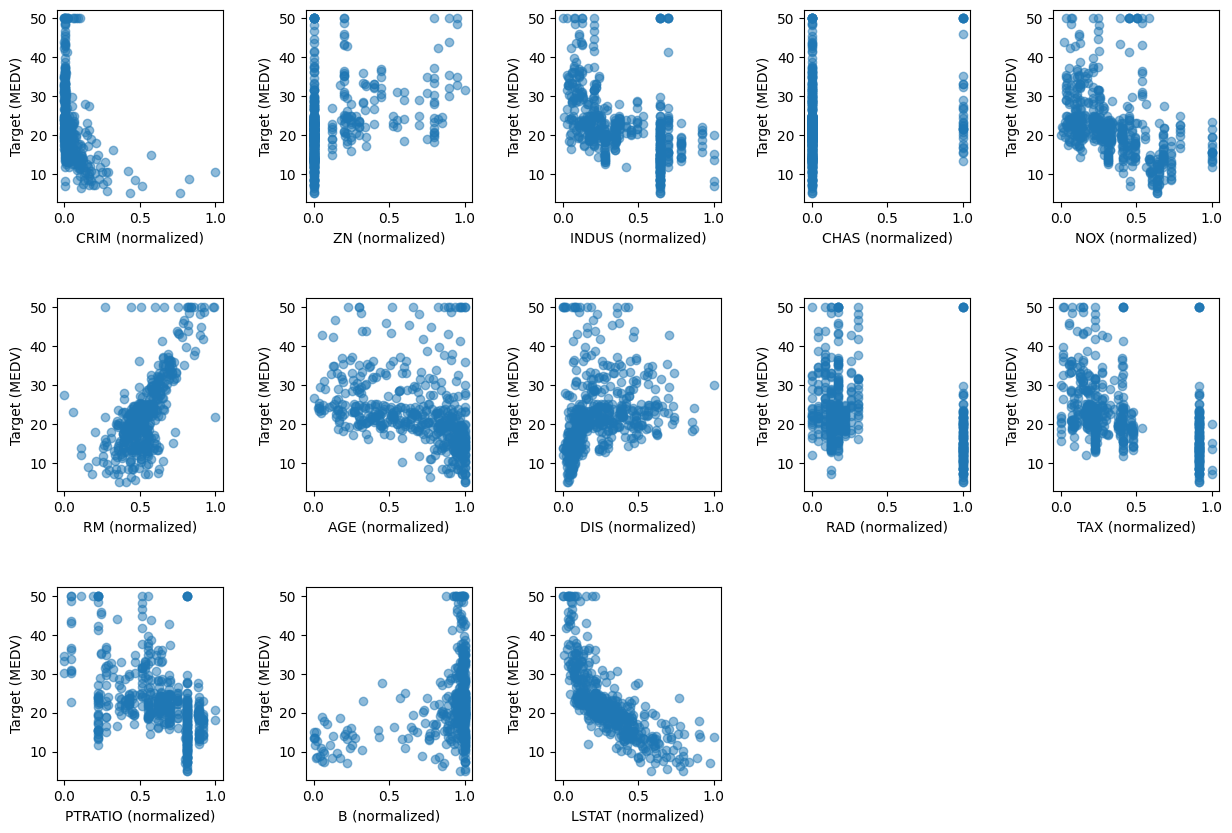

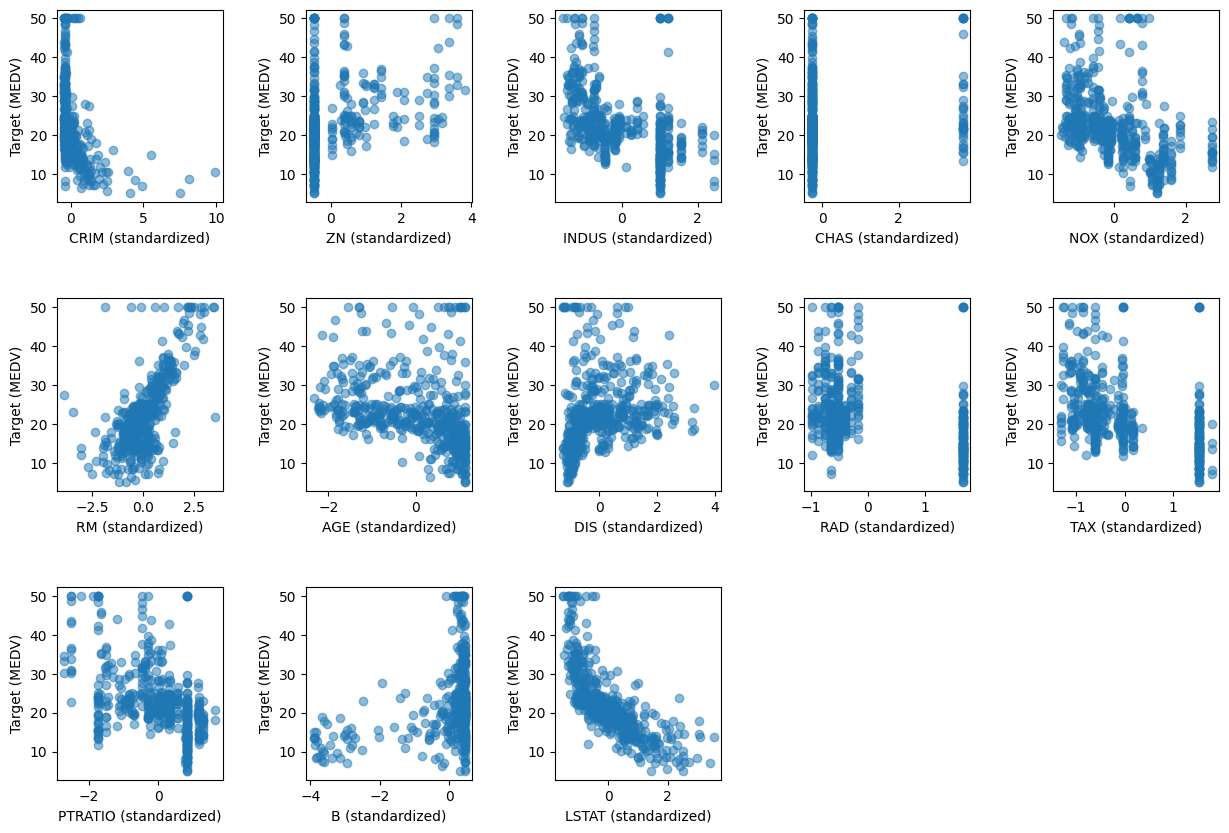

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separazione delle features (X) e del target (y)
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

# Standardizzazione delle caratteristiche
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Stampare la forma della X standardizzata
print("Shape of standardized X:", X_standardized.shape)
print(X_standardized)

# Normalizzazione delle caratteristiche
scaler_minmax = MinMaxScaler()  # Assicurati di aver importato MinMaxScaler se non l'hai già fatto
X_normalized = scaler_minmax.fit_transform(X)

# Stampare la forma della X normalizzata
print("Shape of normalized X:", X_normalized.shape)
print(X_normalized)

import matplotlib.pyplot as plt

# Plot delle caratteristiche rispetto al target per le caratteristiche normalizzate
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(3):
    for j in range(5):
        idx = i * 5 + j
        if idx < X_standardized.shape[1]:  # Controlla se l'indice è valido
            axs[i, j].scatter(X_normalized[:, idx], y, alpha=0.5)
            axs[i, j].set_xlabel(f'{df.columns[idx]} (normalized)')
            axs[i, j].set_ylabel('Target (MEDV)')
        else:
            # Rimuovi gli assi se l'indice non è valido
            axs[i, j].axis('off')
plt.show()

# Plot delle caratteristiche rispetto al target per le caratteristiche standardizzate
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(3):
    for j in range(5):
        idx = i * 5 + j
        if idx < X_standardized.shape[1]:  # Controlla se l'indice è valido
            axs[i, j].scatter(X_standardized[:, idx], y, alpha=0.5)
            axs[i, j].set_xlabel(f'{df.columns[idx]} (standardized)')
            axs[i, j].set_ylabel('Target (MEDV)')
        else:
            # Rimuovi gli assi se l'indice non è valido
            axs[i, j].axis('off')
plt.show()

In [ ]:
# Splitting del dataset in set di addestramento,validation e test prima di preprocessare
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

X= X_standardized
#X_test= X_test_standardized
# train is now 70% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
# test is now 15% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X.shape)
print(y.shape)
print("\nX e y train:")
print(X_train.shape, y_train.shape)
print("\nX e y test:")
print(X_test.shape, y_test.shape)
print("\nX e y validation:")
print(X_val.shape, y_val.shape)

(506, 13)
(506,)

X e y train:
(354, 13) (354,)

X e y test:
(76, 13) (76,)

X e y validation:
(76, 13) (76,)


Dimensioni di X e y prima della rimozione degli outlier:
X shape: (354, 13) y shape: (354,)
Dimensioni di X e y train dopo aver rimosso gli outlier con Isolation Forest:
X shape: (318, 13) y shape: (318,)
Dimensioni di X e y train dopo aver rimosso gli outlier con Elliptic Envelope:
X shape: (318, 13) y shape: (318,)
Dimensioni di X e y train dopo aver rimosso gli outlier con Local Outlier Factor:
X shape: (318, 13) y shape: (318,)
MSE after removing outliers with Isolation Forest: 20.861808542678194
MSE after removing outliers with Elliptic Envelope: 23.344231378045396
MSE after removing outliers with Local Outlier Factor: 22.414299999956466
X_train_if: (318, 13)
y_train_if: (318,)
X_train_ee: (318, 13)
y_train_ee: (318,)
X_train_lof: (318, 13)
y_train_lof: (318,)
Isolation Forest ha il MSE più basso.


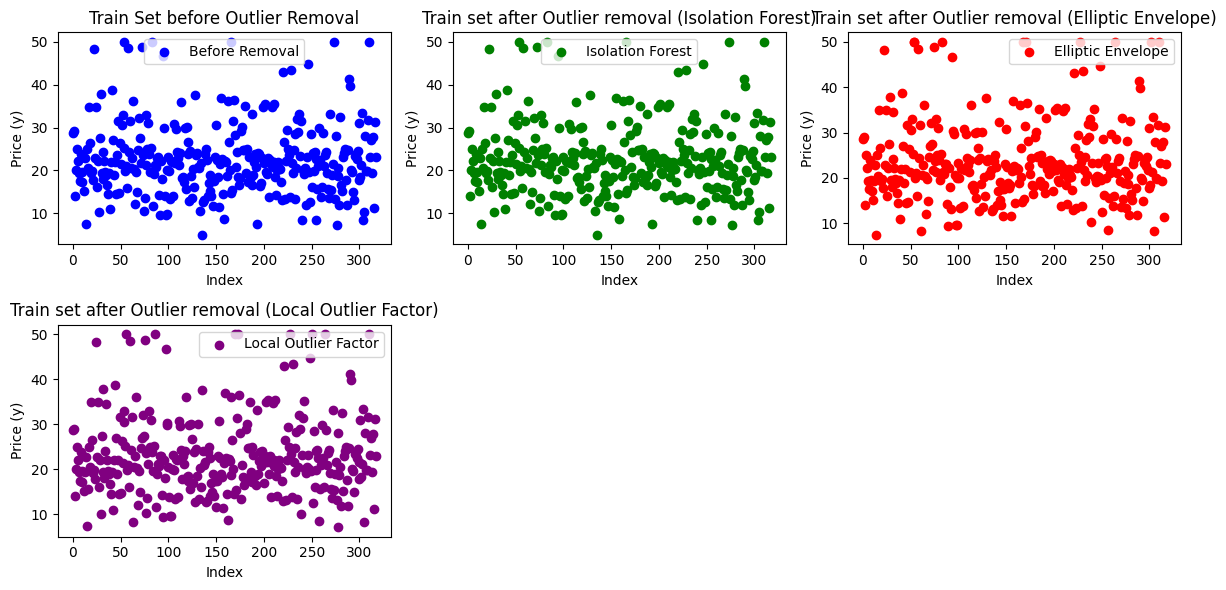

(318,)
(76,)


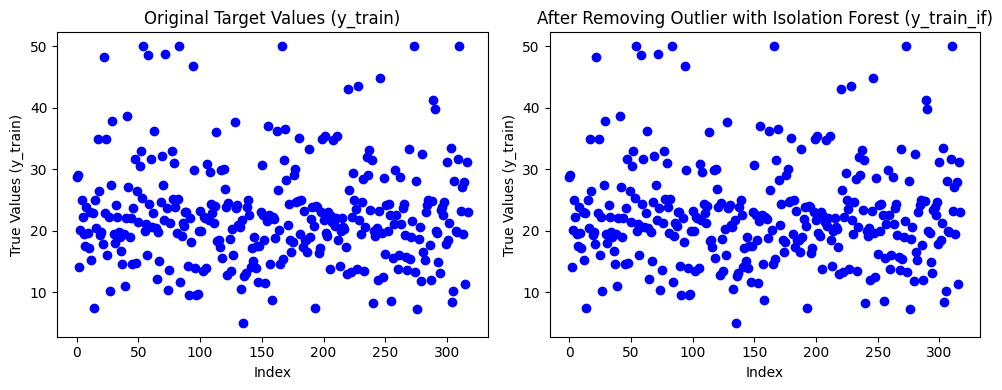

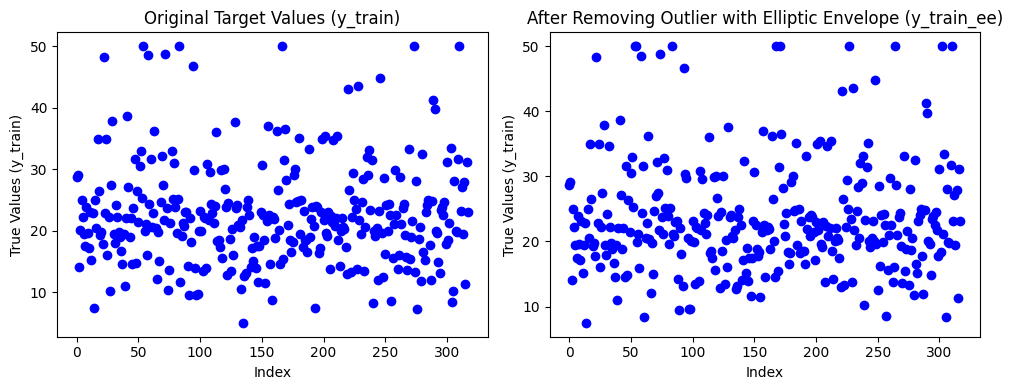

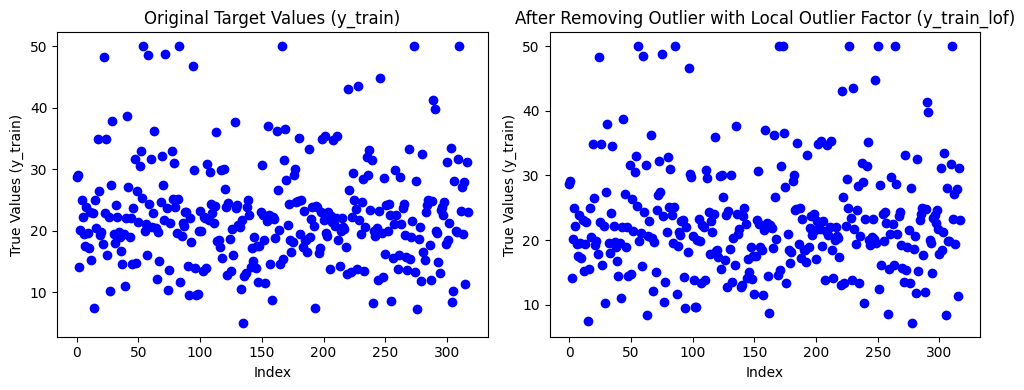

Dimensioni di X e y prima della rimozione degli outlier:
X shape: (76, 13) y shape: (76,)
Dimensioni di X e y val dopo aver rimosso gli outlier con Isolation Forest:
X shape: (68, 13) y shape: (68,)
Dimensioni di X e y val dopo aver rimosso gli outlier con Elliptic Envelope:
X shape: (68, 13) y shape: (68,)
Dimensioni di X e y val dopo aver rimosso gli outlier con Local Outlier Factor:
X shape: (68, 13) y shape: (68,)
MSE after removing outliers with Isolation Forest: 20.10264617532007
MSE after removing outliers with Elliptic Envelope: 29.476430000348376
MSE after removing outliers with Local Outlier Factor: 55.474962322768604
X_val_if: (68, 13)
y_val_if: (68,)
Isolation Forest ha il MSE più basso.


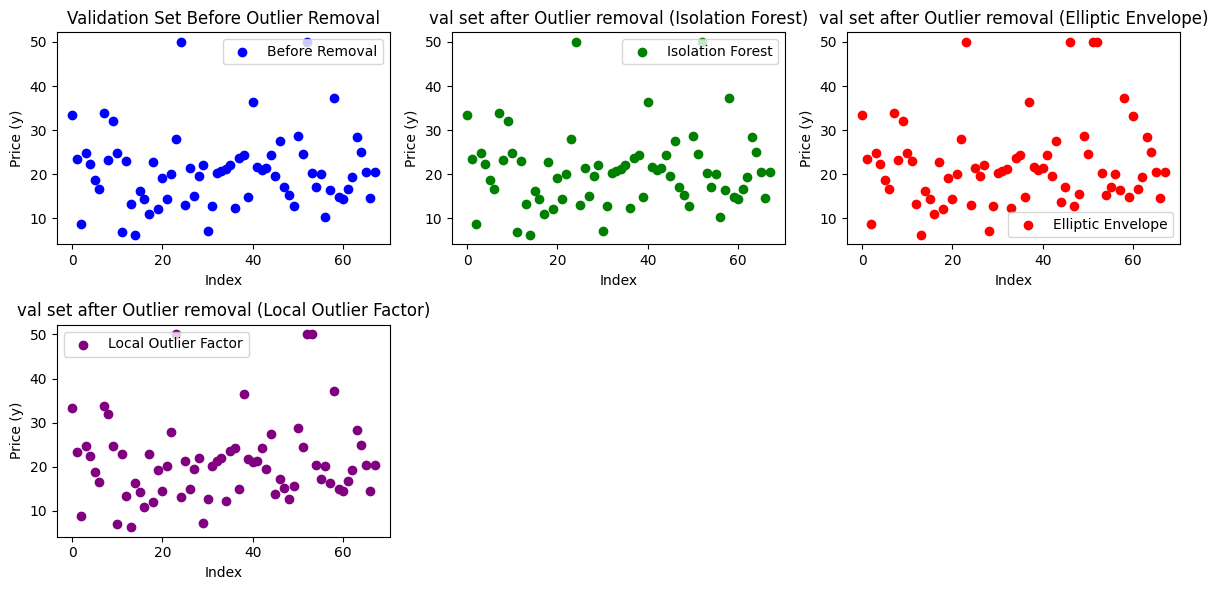

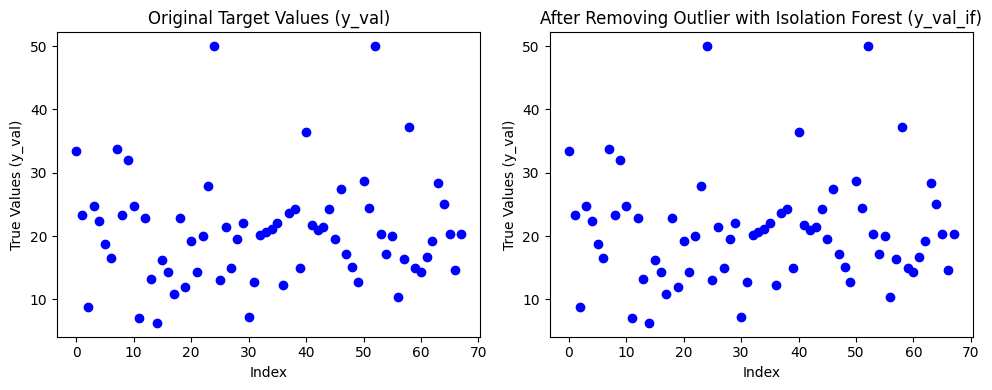

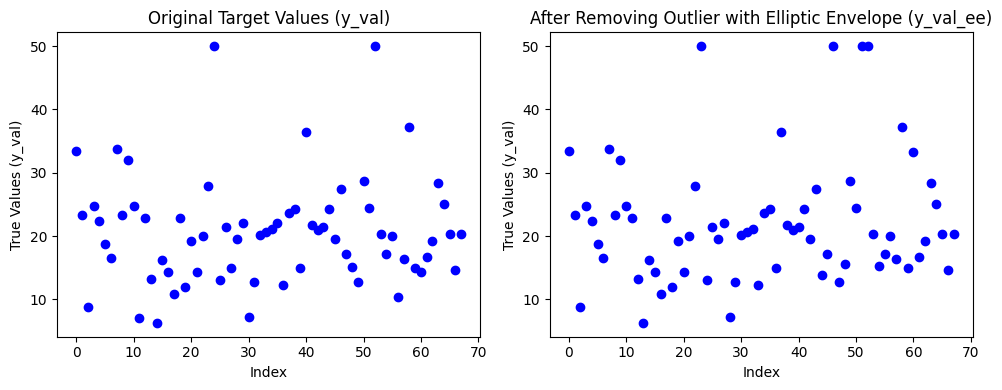

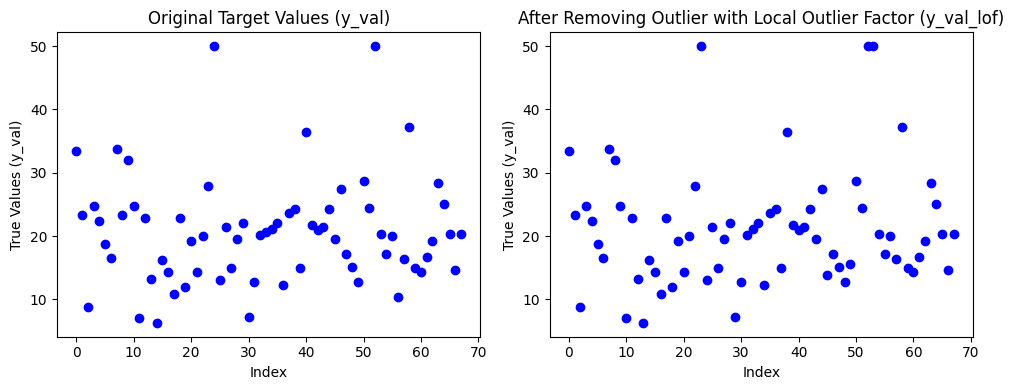

Dimensioni di X e y prima della rimozione degli outlier:
X shape: (76, 13) y shape: (76,)
Dimensioni di X e y test dopo aver rimosso gli outlier con Isolation Forest:
X shape: (68, 13) y shape: (68,)
Dimensioni di X e y test dopo aver rimosso gli outlier con Elliptic Envelope:
X shape: (68, 13) y shape: (68,)
Dimensioni di X e y test dopo aver rimosso gli outlier con Local Outlier Factor:
X shape: (68, 13) y shape: (68,)
MSE after removing outliers with Isolation Forest: 20.675350391062494
MSE after removing outliers with Elliptic Envelope: 21.03033051716923
MSE after removing outliers with Local Outlier Factor: 14.230620569486996
X_test_if: (68, 13)
y_test_if: (68,)


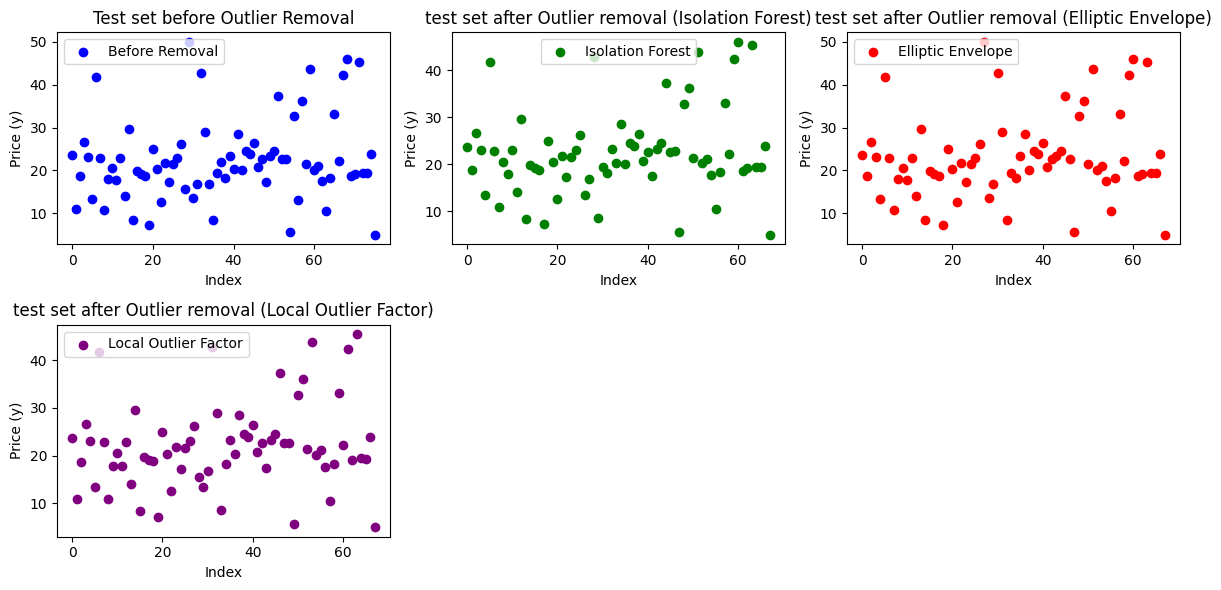

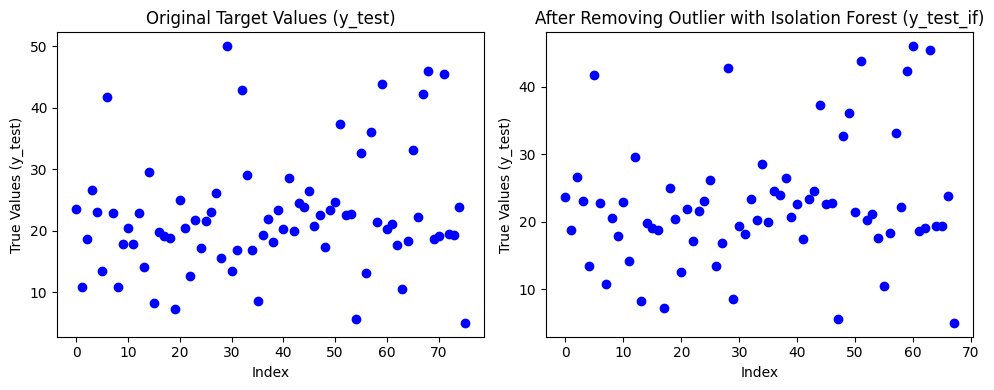

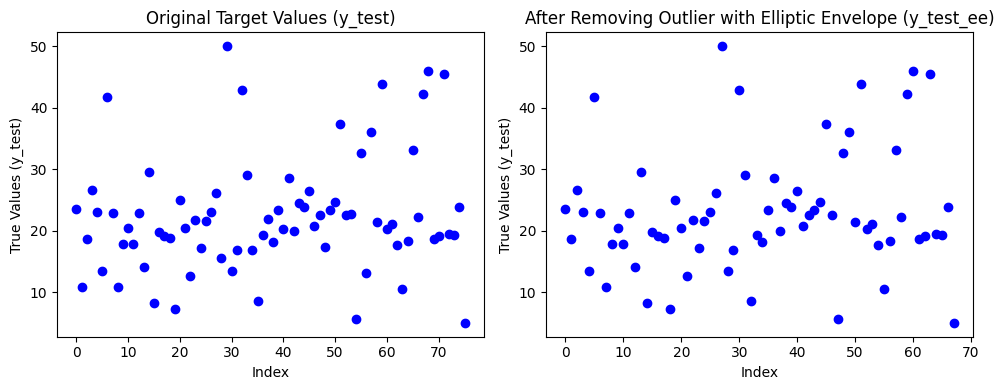

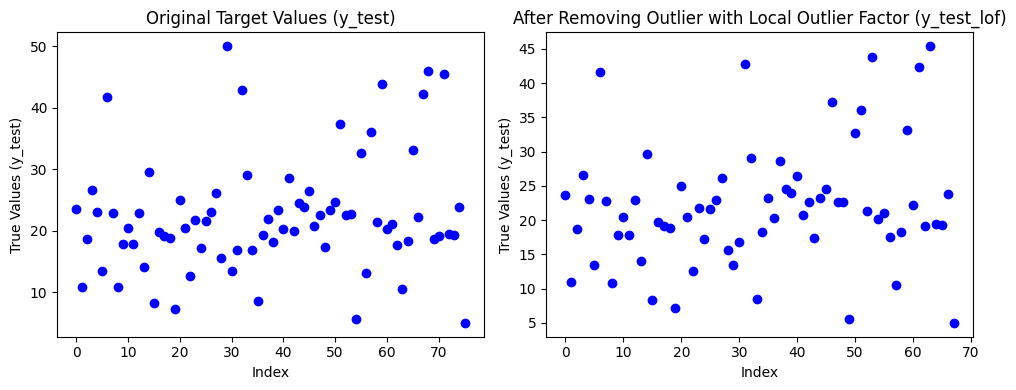

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

########################## TRAIN  ###################################
# Copia dei dati originali per ogni tecnica di rilevamento degli outlier
X_train_if = X_train.copy()
y_train_if = y_train.copy()

X_train_ee = X_train.copy()
y_train_ee = y_train.copy()

X_train_lof = X_train.copy()
y_train_lof = y_train.copy()

# Stampa delle dimensioni di X e y prima della rimozione degli outlier per ogni tecnica
print("Dimensioni di X e y prima della rimozione degli outlier:")
print("X shape:", X_train.shape, "y shape:", y_train.shape)

# Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train_if)
mask_if = yhat != -1
X_train_if = X_train_if[mask_if, :]
y_train_if = y_train_if[mask_if]

# Stampa delle dimensioni di X e y dopo aver rimosso gli outlier con Isolation Forest
print("Dimensioni di X e y train dopo aver rimosso gli outlier con Isolation Forest:")
print("X shape:", X_train_if.shape, "y shape:", y_train_if.shape)

# Elliptic Envelope
ee = EllipticEnvelope(contamination=0.1,support_fraction=0.95)
yhat = ee.fit_predict(X_train_ee)
mask_ee = yhat != -1
X_train_ee = X_train_ee[mask_ee, :]
y_train_ee = y_train_ee[mask_ee]

# Stampa delle dimensioni di X e y dopo aver rimosso gli outlier con Elliptic Envelope
print("Dimensioni di X e y train dopo aver rimosso gli outlier con Elliptic Envelope:")
print("X shape:", X_train_ee.shape, "y shape:", y_train_ee.shape)

# Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.1)
yhat = lof.fit_predict(X_train_lof)
mask_lof = yhat != -1
X_train_lof = X_train_lof[mask_lof, :]
y_train_lof = y_train_lof[mask_lof]

# Stampa delle dimensioni di X e y dopo aver rimosso gli outlier con Local Outlier Factor
print("Dimensioni di X e y train dopo aver rimosso gli outlier con Local Outlier Factor:")
print("X shape:", X_train_lof.shape, "y shape:", y_train_lof.shape)

# fit the model after removing outliers for each technique
model = LinearRegression()

# Isolation Forest
model.fit(X_train_if, y_train_if)
yhat_if = model.predict(X_test)
mse_if_train = mean_squared_error(y_test, yhat_if)
print('MSE after removing outliers with Isolation Forest:', mse_if_train)

# Elliptic Envelope
model.fit(X_train_ee, y_train_ee)
yhat_ee = model.predict(X_test)
mse_ee_train = mean_squared_error(y_test, yhat_ee)
print('MSE after removing outliers with Elliptic Envelope:', mse_ee_train)

# Local Outlier Factor
model.fit(X_train_lof, y_train_lof)
yhat_lof = model.predict(X_test)
mse_lof_train = mean_squared_error(y_test, yhat_lof)
print('MSE after removing outliers with Local Outlier Factor:', mse_lof_train)

# Controllo per assegnare a X e y i nuovi valori senza outlier dell'algoritmo con l'MSE più basso
min_mse = min(mse_if_train, mse_ee_train, mse_lof_train)

print("X_train_if:", X_train_if.shape)
print("y_train_if:", y_train_if.shape)
print("X_train_ee:", X_train_ee.shape)
print("y_train_ee:", y_train_ee.shape)
print("X_train_lof:", X_train_lof.shape)
print("y_train_lof:", y_train_lof.shape)

# Controlla quale tecnica ha l'MSE più basso per il training set
min_mse_train = min(mse_if_train, mse_ee_train, mse_lof_train)

if min_mse_train == mse_if_train:
    X_train = X_train_if
    y_train = y_train_if
    print("Isolation Forest ha il MSE più basso.")
elif min_mse_train == mse_ee_train:
    X_train = X_train_ee
    y_train = y_train_ee
    print("Elliptic Envelope ha il MSE più basso.")
elif min_mse_train == mse_lof_train:
    X_train = X_train_lof
    y_train = y_train_lof
    print("Local Outlier Factor ha il MSE più basso.")

# Plot dei valori target (y) prima e dopo la rimozione degli outlier
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.scatter(range(len(y_train)), y_train, color='blue', label='Before Removal')
plt.title('Train Set before Outlier Removal')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.subplot(2, 3, 2)
plt.scatter(range(len(y_train_if)), y_train_if, color='green', label='Isolation Forest')
plt.title('Train set after Outlier removal (Isolation Forest)')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.subplot(2, 3, 3)
plt.scatter(range(len(y_train_ee)), y_train_ee, color='red', label='Elliptic Envelope')
plt.title('Train set after Outlier removal (Elliptic Envelope)')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.subplot(2, 3, 4)
plt.scatter(range(len(y_train_lof)), y_train_lof, color='purple', label='Local Outlier Factor')
plt.title('Train set after Outlier removal (Local Outlier Factor)')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.tight_layout()
plt.show()

print(y_train.shape)
print(yhat_if.shape)

plt.figure(figsize=(10, 4))
# Plot con y_train originale
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_train)), y_train, color='blue')
plt.title('Original Target Values (y_train)')
plt.xlabel('Index')
plt.ylabel('True Values (y_train)')

# Plot con y_train dopo la rimozione degli outlier
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_train_if)), y_train_if, color='blue')
plt.title('After Removing Outlier with Isolation Forest (y_train_if)')
plt.xlabel('Index')
plt.ylabel('True Values (y_train)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
# Plot con y_train originale
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_train)), y_train, color='blue')
plt.title('Original Target Values (y_train)')
plt.xlabel('Index')
plt.ylabel('True Values (y_train)')

# Plot con y_train dopo la rimozione degli outlier
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_train_ee)), y_train_ee, color='blue')
plt.title('After Removing Outlier with Elliptic Envelope (y_train_ee)')
plt.xlabel('Index')
plt.ylabel('True Values (y_train)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
# Plot con y_train originale
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_train)), y_train, color='blue')
plt.title('Original Target Values (y_train)')
plt.xlabel('Index')
plt.ylabel('True Values (y_train)')

# Plot con y_train dopo la rimozione degli outlier
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_train_lof)), y_train_lof, color='blue')
plt.title('After Removing Outlier with Local Outlier Factor (y_train_lof)')
plt.xlabel('Index')
plt.ylabel('True Values (y_train)')
plt.tight_layout()
plt.show()

######### VALIDATION  ###################################
# Copia dei dati originali per ogni tecnica di rilevamento degli outlier
X_val_if = X_val.copy()
y_val_if = y_val.copy()

X_val_ee = X_val.copy()
y_val_ee = y_val.copy()

X_val_lof = X_val.copy()
y_val_lof = y_val.copy()

# Stampa delle dimensioni di X e y prima della rimozione degli outlier per ogni tecnica
print("Dimensioni di X e y prima della rimozione degli outlier:")
print("X shape:", X_val.shape, "y shape:", y_val.shape)

# Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_val_if)
mask_if = yhat != -1
X_val_if = X_val_if[mask_if, :]
y_val_if = y_val_if[mask_if]

# Stampa delle dimensioni di X e y dopo aver rimosso gli outlier con Isolation Forest
print("Dimensioni di X e y val dopo aver rimosso gli outlier con Isolation Forest:")
print("X shape:", X_val_if.shape, "y shape:", y_val_if.shape)

# Elliptic Envelope
ee = EllipticEnvelope(contamination=0.1,support_fraction=0.95)
yhat = ee.fit_predict(X_val_ee)
mask_ee = yhat != -1
X_val_ee = X_val_ee[mask_ee, :]
y_val_ee = y_val_ee[mask_ee]

# Stampa delle dimensioni di X e y dopo aver rimosso gli outlier con Elliptic Envelope
print("Dimensioni di X e y val dopo aver rimosso gli outlier con Elliptic Envelope:")
print("X shape:", X_val_ee.shape, "y shape:", y_val_ee.shape)

# Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.1)
yhat = lof.fit_predict(X_val_lof)
mask_lof = yhat != -1
X_val_lof = X_val_lof[mask_lof, :]
y_val_lof = y_val_lof[mask_lof]

# Stampa delle dimensioni di X e y dopo aver rimosso gli outlier con Local Outlier Factor
print("Dimensioni di X e y val dopo aver rimosso gli outlier con Local Outlier Factor:")
print("X shape:", X_val_lof.shape, "y shape:", y_val_lof.shape)

# fit the model after removing outliers for each technique
model = LinearRegression()

# Isolation Forest
model.fit(X_val_if, y_val_if)
yhat_if = model.predict(X_test)
mse_if_val = mean_squared_error(y_test, yhat_if)
print('MSE after removing outliers with Isolation Forest:', mse_if_val)

# Elliptic Envelope
model.fit(X_val_ee, y_val_ee)
yhat_ee = model.predict(X_test)
mse_ee_val = mean_squared_error(y_test, yhat_ee)
print('MSE after removing outliers with Elliptic Envelope:', mse_ee_val)

# Local Outlier Factor
model.fit(X_val_lof, y_val_lof)
yhat_lof = model.predict(X_test)
mse_lof_val = mean_squared_error(y_test, yhat_lof)
print('MSE after removing outliers with Local Outlier Factor:', mse_lof_val)

# Controllo per assegnare a X e y i nuovi valori senza outlier dell'algoritmo con l'MSE più basso
min_mse_val = min(mse_if_val, mse_ee_val, mse_lof_val)

print("X_val_if:", X_val_if.shape)
print("y_val_if:", y_val_if.shape)
if min_mse_val == mse_if_val:
    X_val = X_val_if
    y_val = y_val_if
    print("Isolation Forest ha il MSE più basso.")
elif min_mse_val == mse_ee_val:
    X_val = X_val_ee
    y_val = y_val_ee
    print("Elliptic Envelope ha il MSE più basso.")
elif min_mse_val == mse_lof_val:
    X_val = X_val_lof
    y_val = y_val_lof
    print("Local Outlier Factor ha il MSE più basso.")

# Plot dei valori target (y) prima e dopo la rimozione degli outlier
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.scatter(range(len(y_val)), y_val, color='blue', label='Before Removal')
plt.title('Validation Set Before Outlier Removal')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.subplot(2, 3, 2)
plt.scatter(range(len(y_val_if)), y_val_if, color='green', label='Isolation Forest')
plt.title('val set after Outlier removal (Isolation Forest)')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.subplot(2, 3, 3)
plt.scatter(range(len(y_val_ee)), y_val_ee, color='red', label='Elliptic Envelope')
plt.title('val set after Outlier removal (Elliptic Envelope)')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.subplot(2, 3, 4)
plt.scatter(range(len(y_val_lof)), y_val_lof, color='purple', label='Local Outlier Factor')
plt.title('val set after Outlier removal (Local Outlier Factor)')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
# Plot con y_val originale
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_val)), y_val, color='blue')
plt.title('Original Target Values (y_val)')
plt.xlabel('Index')
plt.ylabel('True Values (y_val)')

# Plot con y_val dopo la rimozione degli outlier
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_val_if)), y_val_if, color='blue')
plt.title('After Removing Outlier with Isolation Forest (y_val_if)')
plt.xlabel('Index')
plt.ylabel('True Values (y_val)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
# Plot con y_val originale
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_val)), y_val, color='blue')
plt.title('Original Target Values (y_val)')
plt.xlabel('Index')
plt.ylabel('True Values (y_val)')

# Plot con y_val dopo la rimozione degli outlier
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_val_ee)), y_val_ee, color='blue')
plt.title('After Removing Outlier with Elliptic Envelope (y_val_ee)')
plt.xlabel('Index')
plt.ylabel('True Values (y_val)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
# Plot con y_val originale
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_val)), y_val, color='blue')
plt.title('Original Target Values (y_val)')
plt.xlabel('Index')
plt.ylabel('True Values (y_val)')

# Plot con y_val dopo la rimozione degli outlier
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_val_lof)), y_val_lof, color='blue')
plt.title('After Removing Outlier with Local Outlier Factor (y_val_lof)')
plt.xlabel('Index')
plt.ylabel('True Values (y_val)')
plt.tight_layout()
plt.show()

########################## TEST  ###################################
# Copia dei dati originali per ogni tecnica di rilevamento degli outlier
X_test_if = X_test.copy()
y_test_if = y_test.copy()

X_test_ee = X_test.copy()
y_test_ee = y_test.copy()

X_test_lof = X_test.copy()
y_test_lof = y_test.copy()

# Stampa delle dimensioni di X e y prima della rimozione degli outlier per ogni tecnica
print("Dimensioni di X e y prima della rimozione degli outlier:")
print("X shape:", X_test.shape, "y shape:", y_test.shape)

# Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_test_if)
mask_if = yhat != -1
X_test_if = X_test_if[mask_if, :]
y_test_if = y_test_if[mask_if]

# Stampa delle dimensioni di X e y dopo aver rimosso gli outlier con Isolation Forest
print("Dimensioni di X e y test dopo aver rimosso gli outlier con Isolation Forest:")
print("X shape:", X_test_if.shape, "y shape:", y_test_if.shape)

# Elliptic Envelope
ee = EllipticEnvelope(contamination=0.1,support_fraction=0.95)
yhat = ee.fit_predict(X_test_ee)
mask_ee = yhat != -1
X_test_ee = X_test_ee[mask_ee, :]
y_test_ee = y_test_ee[mask_ee]

# Stampa delle dimensioni di X e y dopo aver rimosso gli outlier con Elliptic Envelope
print("Dimensioni di X e y test dopo aver rimosso gli outlier con Elliptic Envelope:")
print("X shape:", X_test_ee.shape, "y shape:", y_test_ee.shape)

# Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.1)
yhat = lof.fit_predict(X_test_lof)
mask_lof = yhat != -1
X_test_lof = X_test_lof[mask_lof, :]
y_test_lof = y_test_lof[mask_lof]

# Stampa delle dimensioni di X e y dopo aver rimosso gli outlier con Local Outlier Factor
print("Dimensioni di X e y test dopo aver rimosso gli outlier con Local Outlier Factor:")
print("X shape:", X_test_lof.shape, "y shape:", y_test_lof.shape)

# fit the model after removing outliers for each technique
model = LinearRegression()

# Isolation Forest
model.fit(X_test_if, y_test_if)
yhat_if = model.predict(X_test)
mse_if_test = mean_squared_error(y_test, yhat_if)
print('MSE after removing outliers with Isolation Forest:', mse_if_test)

# Elliptic Envelope
model.fit(X_test_ee, y_test_ee)
yhat_ee = model.predict(X_test)
mse_ee_test = mean_squared_error(y_test, yhat_ee)
print('MSE after removing outliers with Elliptic Envelope:', mse_ee_test)

# Local Outlier Factor
model.fit(X_test_lof, y_test_lof)
yhat_lof = model.predict(X_test)
mse_lof_test = mean_squared_error(y_test, yhat_lof)
print('MSE after removing outliers with Local Outlier Factor:', mse_lof_test)

# Controllo per assegnare a X e y i nuovi valori senza outlier dell'algoritmo con l'MSE più basso
min_mse_test = min(mse_if_test, mse_ee_test, mse_lof_test)

print("X_test_if:", X_test_if.shape)
print("y_test_if:", y_test_if.shape)
if min_mse == mse_if_test:
    X_test = X_test_if
    y_test = y_test_if
    print("Isolation Forest ha il MSE più basso.")
elif min_mse == mse_ee_test:
    X_test = X_test_ee
    y_test = y_test_ee
    print("Elliptic Envelope ha il MSE più basso.")
elif min_mse == mse_lof_test:
    X_test = X_test_lof
    y_test = y_test_lof
    print("Local Outlier Factor ha il MSE più basso.")

# Plot dei valori target (y) prima e dopo la rimozione degli outlier
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Before Removal')
plt.title('Test set before Outlier Removal')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.subplot(2, 3, 2)
plt.scatter(range(len(y_test_if)), y_test_if, color='green', label='Isolation Forest')
plt.title('test set after Outlier removal (Isolation Forest)')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.subplot(2, 3, 3)
plt.scatter(range(len(y_test_ee)), y_test_ee, color='red', label='Elliptic Envelope')
plt.title('test set after Outlier removal (Elliptic Envelope)')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.subplot(2, 3, 4)
plt.scatter(range(len(y_test_lof)), y_test_lof, color='purple', label='Local Outlier Factor')
plt.title('test set after Outlier removal (Local Outlier Factor)')
plt.xlabel('Index')
plt.ylabel('Price (y)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
# Plot con y_test originale
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.title('Original Target Values (y_test)')
plt.xlabel('Index')
plt.ylabel('True Values (y_test)')

# Plot con y_test dopo la rimozione degli outlier
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test_if)), y_test_if, color='blue')
plt.title('After Removing Outlier with Isolation Forest (y_test_if)')
plt.xlabel('Index')
plt.ylabel('True Values (y_test)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
# Plot con y_test originale
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.title('Original Target Values (y_test)')
plt.xlabel('Index')
plt.ylabel('True Values (y_test)')

# Plot con y_test dopo la rimozione degli outlier
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test_ee)), y_test_ee, color='blue')
plt.title('After Removing Outlier with Elliptic Envelope (y_test_ee)')
plt.xlabel('Index')
plt.ylabel('True Values (y_test)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
# Plot con y_test originale
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.title('Original Target Values (y_test)')
plt.xlabel('Index')
plt.ylabel('True Values (y_test)')

# Plot con y_test dopo la rimozione degli outlier
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test_lof)), y_test_lof, color='blue')
plt.title('After Removing Outlier with Local Outlier Factor (y_test_lof)')
plt.xlabel('Index')
plt.ylabel('True Values (y_test)')
plt.tight_layout()
plt.show()

In [ ]:
print("Nuovi shape dei vari dataset:")
print("X_train:")
print(X_train.shape)
print("X_validation")
print(X_val.shape)
print("X_test")
print(X_test.shape)
print("Y_train:")
print(y_train.shape)
print("Y_validation")
print(y_val.shape)
print("Y_test")
print(y_test.shape)

Nuovi shape dei vari dataset:
X_train:
(318, 13)
X_validation
(68, 13)
X_test
(76, 13)
Y_train:
(318,)
Y_validation
(68,)
Y_test
(76,)


Mean Squared Error su set di convalida (Regressione Lineare): 17.840730269726425
Mean Squared Error su set di test (Regressione Lineare): 20.861808542678194


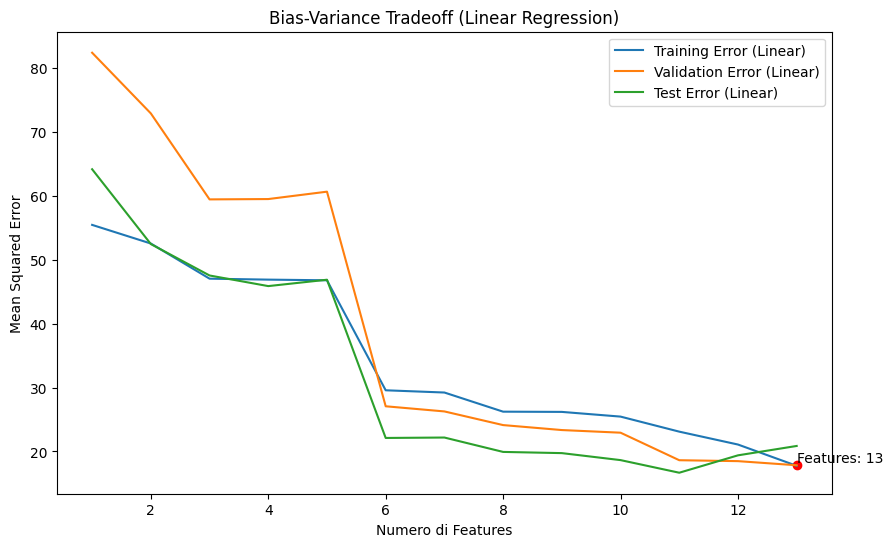

Mean Squared Error su set di convalida (Ridge): 17.725889192198306
Mean Squared Error su set di test (Ridge): 20.808752947336792


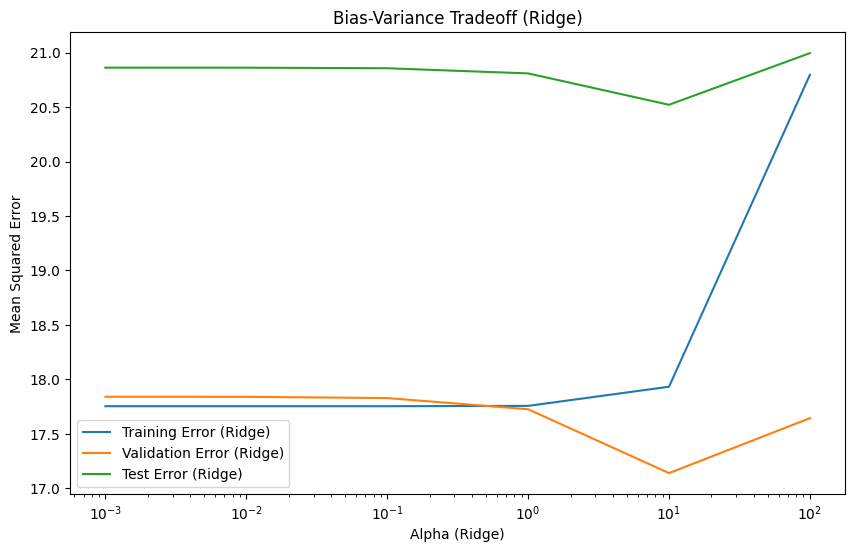

Mean Squared Error su set di convalida (Lasso): 21.295154807138225
Mean Squared Error su set di test (Lasso): 25.260636596562495


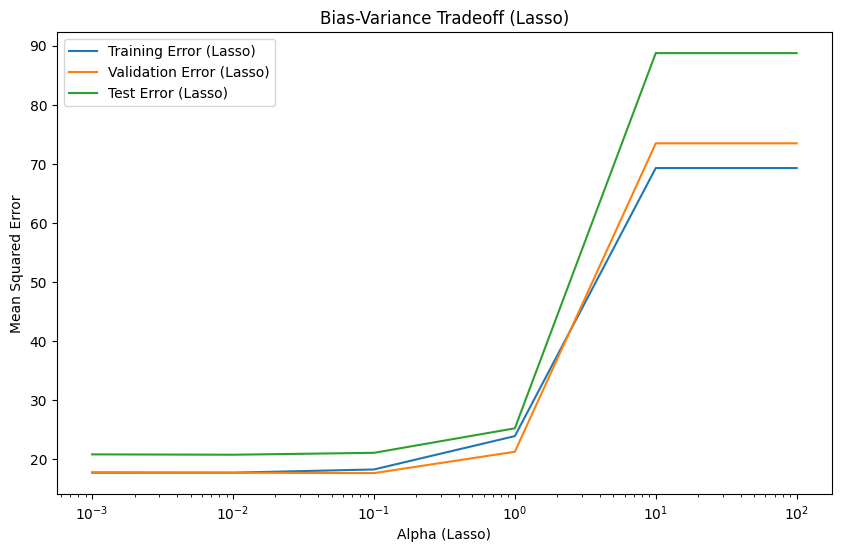

Mean Squared Error su set di convalida (Elastic Net): 22.17055469530536
Mean Squared Error su set di test (Elastic Net): 26.621545838983014


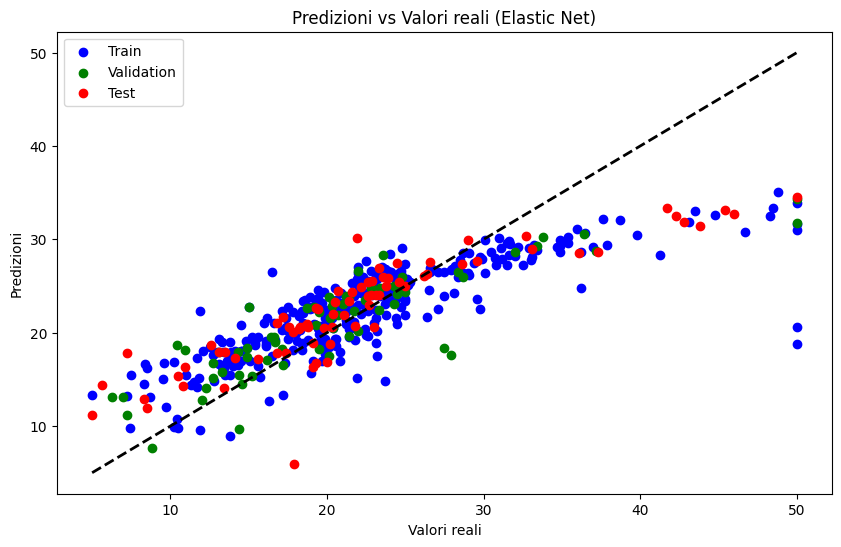

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#il training test deve essere sempre monotono decrescente

def bias_variance_tradeoff(X_train, X_val, X_test, y_train, y_val, y_test, model):
    train_errors = []
    val_errors = []
    test_errors = []
    complexities = []

    for i in range(1, X_train.shape[1] + 1):
        model.fit(X_train[:, :i], y_train)
        train_errors.append(mean_squared_error(y_train, model.predict(X_train[:, :i])))
        val_errors.append(mean_squared_error(y_val, model.predict(X_val[:, :i])))
        test_errors.append(mean_squared_error(y_test, model.predict(X_test[:, :i])))
        complexities.append(i)

    min_val_error_index = np.argmin(val_errors)

    if min_val_error_index == len(val_errors) - 1:
        val_error_sign = 0
    else:
        val_error_sign = val_errors[min_val_error_index] - val_errors[min_val_error_index + 1]

    return complexities, train_errors, val_errors, test_errors, min_val_error_index, val_error_sign

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

val_predictions_linear = linear_model.predict(X_val)
val_mse_linear = mean_squared_error(y_val, val_predictions_linear)
print("Mean Squared Error su set di convalida (Regressione Lineare):", val_mse_linear)

test_predictions_linear = linear_model.predict(X_test)
test_mse_linear = mean_squared_error(y_test, test_predictions_linear)
print("Mean Squared Error su set di test (Regressione Lineare):", test_mse_linear)

complexities_linear, train_errors_linear, val_errors_linear, test_errors_linear, min_val_error_index_linear, val_error_sign_linear = bias_variance_tradeoff(X_train, X_val, X_test, y_train, y_val, y_test, linear_model)

plt.figure(figsize=(10, 6))
plt.plot(complexities_linear, train_errors_linear, label='Training Error (Linear)')
plt.plot(complexities_linear, val_errors_linear, label='Validation Error (Linear)')
plt.plot(complexities_linear, test_errors_linear, label='Test Error (Linear)')
plt.xlabel('Numero di Features')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff (Linear Regression)')
plt.legend()

if val_error_sign_linear >= 0:
    plt.scatter(complexities_linear[min_val_error_index_linear], val_errors_linear[min_val_error_index_linear], color='red', marker='o', label='Stop Decreasing (Linear)')
    plt.text(complexities_linear[min_val_error_index_linear], val_errors_linear[min_val_error_index_linear], f'Features: {complexities_linear[min_val_error_index_linear]}', verticalalignment='bottom', horizontalalignment='left', fontsize=10)

plt.show()

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

val_predictions_ridge = ridge_model.predict(X_val)
val_mse_ridge = mean_squared_error(y_val, val_predictions_ridge)
print("Mean Squared Error su set di convalida (Ridge):", val_mse_ridge)

test_predictions_ridge = ridge_model.predict(X_test)
test_mse_ridge = mean_squared_error(y_test, test_predictions_ridge)
print("Mean Squared Error su set di test (Ridge):", test_mse_ridge)

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
train_errors_ridge = []
val_errors_ridge = []
test_errors_ridge = []

for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    train_errors_ridge.append(mean_squared_error(y_train, model_ridge.predict(X_train)))
    val_errors_ridge.append(mean_squared_error(y_val, model_ridge.predict(X_val)))
    test_errors_ridge.append(mean_squared_error(y_test, model_ridge.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors_ridge, label='Training Error (Ridge)')
plt.plot(alphas, val_errors_ridge, label='Validation Error (Ridge)')
plt.plot(alphas, test_errors_ridge, label='Test Error (Ridge)')
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff (Ridge)')
plt.xscale('log')
plt.legend()
plt.show()

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

val_predictions_lasso = lasso_model.predict(X_val)
val_mse_lasso = mean_squared_error(y_val, val_predictions_lasso)
print("Mean Squared Error su set di convalida (Lasso):", val_mse_lasso)

test_predictions_lasso = lasso_model.predict(X_test)
test_mse_lasso = mean_squared_error(y_test, test_predictions_lasso)
print("Mean Squared Error su set di test (Lasso):", test_mse_lasso)

train_errors_lasso = []
val_errors_lasso = []
test_errors_lasso = []

for alpha in alphas:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)
    train_errors_lasso.append(mean_squared_error(y_train, model_lasso.predict(X_train)))
    val_errors_lasso.append(mean_squared_error(y_val, model_lasso.predict(X_val)))
    test_errors_lasso.append(mean_squared_error(y_test, model_lasso.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors_lasso, label='Training Error (Lasso)')
plt.plot(alphas, val_errors_lasso, label='Validation Error (Lasso)')
plt.plot(alphas, test_errors_lasso, label='Test Error (Lasso)')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff (Lasso)')
plt.xscale('log')
plt.legend()
plt.show()

# Elastic Net
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

val_predictions_en = elastic_net_model.predict(X_val)
val_mse_en = mean_squared_error(y_val, val_predictions_en)
print("Mean Squared Error su set di convalida (Elastic Net):", val_mse_en)

test_predictions_en = elastic_net_model.predict(X_test)
test_mse_en = mean_squared_error(y_test, test_predictions_en)
print("Mean Squared Error su set di test (Elastic Net):", test_mse_en)

# Plot delle predizioni vs valori reali per Elastic Net
plt.figure(figsize=(10, 6))
plt.scatter(y_train, elastic_net_model.predict(X_train), color='blue', label='Train')
plt.scatter(y_val, val_predictions_en, color='green', label='Validation')
plt.scatter(y_test, test_predictions_en, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valori reali')
plt.ylabel('Predizioni')
plt.title('Predizioni vs Valori reali (Elastic Net)')
plt.legend()
plt.show()


In [ ]:
X= X_train
y= y_train

## Baseline Machine Learning Models: Regressors with Default Hyperparameters

### Using 3-Fold Cross-Validation

### Defining the Artificial Neural Network

In [ ]:
#ANN
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

def ANN(optimizer = 'adam',neurons=32,batch_size=32,epochs=50,activation='relu',patience=5,loss='mse'):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Input layer with input shape (13 features)
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience) # early stop patience
    history = model.fit(X, y,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

In [ ]:
import tensorflow as tf

@tf.function(reduce_retracing =True)
def predict_with_model(model, X):
    return model.predict(X)

@tf.function(reduce_retracing=True)
def predict_with_model(model, X):
    return model.predict(X)

results = []

# 3-Fold Cross-Validation
# Random Forest
clf_rf = RandomForestRegressor()
start_time = time.time()
scores_rf_mse = cross_val_score(clf_rf, X, y, cv=3, scoring='neg_mean_squared_error')
scores_rf_r2 = cross_val_score(clf_rf, X, y, cv=3, scoring='r2')
elapsed_time_rf = round(time.time() - start_time, 2)
results.append({'Algorithm': 'Random Forest',
                'MSE': -scores_rf_mse.mean(),
                'R²': scores_rf_r2.mean(),
                'Time Elapsed (s)': elapsed_time_rf})

# SVM
clf_svm = SVR()
start_time = time.time()
scores_svm_mse = cross_val_score(clf_svm, X, y, cv=3, scoring='neg_mean_squared_error')
scores_svm_r2 = cross_val_score(clf_svm, X, y, cv=3, scoring='r2')
elapsed_time_svm = round(time.time() - start_time, 2)
results.append({'Algorithm': 'SVM',
                'MSE': -scores_svm_mse.mean(),
                'R²': scores_svm_r2.mean(),
                'Time Elapsed (s)': elapsed_time_svm})

# KNN
clf_knn = KNeighborsRegressor()
start_time = time.time()
scores_knn_mse = cross_val_score(clf_knn, X, y, cv=3, scoring='neg_mean_squared_error')
scores_knn_r2 = cross_val_score(clf_knn, X, y, cv=3, scoring='r2')
elapsed_time_knn = round(time.time() - start_time, 2)
results.append({'Algorithm': 'KNN',
                'MSE': -scores_knn_mse.mean(),
                'R²': scores_knn_r2.mean(),
                'Time Elapsed (s)': elapsed_time_knn})

# ANN
start_time = time.time()
clf_ann = KerasRegressor(model=ANN, epochs=10, batch_size=10, verbose=0)
scores_ann_mse = cross_val_score(clf_ann, X, y, cv=3, scoring='neg_mean_squared_error')
scores_ann_r2 = cross_val_score(clf_ann, X, y, cv=3, scoring='r2')
elapsed_time_ann = round(time.time() - start_time, 2)
results.append({'Algorithm': 'ANN',
                'MSE': -scores_ann_mse.mean(),
                'R²': scores_ann_r2.mean(),
                'Time Elapsed (s)': elapsed_time_ann})

results_df_3_fold = pd.DataFrame(results)
print("Results for 3-Fold Cross-Validation")
print(results_df_3_fold.to_string(index=False))

Results for 3-Fold Cross-Validation
    Algorithm       MSE       R²  Time Elapsed (s)
Random Forest 12.410922 0.819721              5.44
          SVM 27.832191 0.603039              0.15
          KNN 21.243325 0.695105              0.07
          ANN 13.509698 0.812189             37.49


## HPO Algorithm 1: Grid Search
Search all the given hyper-parameter configurations

**Advantages:**
* Simple implementation.  

**Disadvantages:**  
* Time-consuming,
* Only efficient with categorical HPs.

In [ ]:
#Grid Search
#about 16 minutes to run
# Inizializza i dati per la tabella
results_grid_search = []

from sklearn.metrics import r2_score

# Random Forest
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [15, 20, 30, 50]
}
clf_rf = RandomForestRegressor(random_state=0)
start_time = time.time()
grid_rf = GridSearchCV(clf_rf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time, 2)
y_pred_rf = grid_rf.best_estimator_.predict(X)
r2_rf = r2_score(y, y_pred_rf)
results_grid_search.append({'Algorithm': 'Random Forest', 'Best Params': grid_rf.best_params_, 'MSE': -grid_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'epsilon': [0.01, 0.1, 1]
}
clf_svm = SVR(gamma='scale')
start_time = time.time()
grid_svm = GridSearchCV(clf_svm, svm_params, cv=3, scoring='neg_mean_squared_error')
grid_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time, 2)
y_pred_svm = grid_svm.best_estimator_.predict(X)
r2_svm = r2_score(y, y_pred_svm)
results_grid_search.append({'Algorithm': 'SVM', 'Best Params': grid_svm.best_params_, 'MSE': -grid_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': [2, 3, 5, 7, 10]
}
clf_knn = KNeighborsRegressor()
start_time = time.time()
grid_knn = GridSearchCV(clf_knn, knn_params, cv=3, scoring='neg_mean_squared_error')
grid_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time, 2)
y_pred_knn = grid_knn.best_estimator_.predict(X)
r2_knn = r2_score(y, y_pred_knn)
results_grid_search.append({'Algorithm': 'KNN', 'Best Params': grid_knn.best_params_, 'MSE': -grid_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

#ANN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse'],
    'batch_size': [16,32],
    'neurons':[16,32],
    'epochs':[20,50],
    'patience':[2,5]
}

start_time = time.time()
clf = KerasRegressor(model=ANN, activation='relu', neurons=16, patience=2, verbose=0)
grid_ann = GridSearchCV(clf, rf_params, cv=3, n_jobs=-1,scoring='neg_mean_squared_error')
grid_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time, 2)
y_pred_ann = grid_ann.best_estimator_.predict(X)
r2_ann = r2_score(y, y_pred_ann)
results_grid_search.append({'Algorithm': 'ANN', 'Best Params': grid_ann.best_params_, 'MSE': -grid_ann.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

results_df_grid_search = pd.DataFrame(results_grid_search)

print("Results for Grid Search")
print(results_df_grid_search.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Results for Grid Search
    Algorithm                                                                                                              Best Params       MSE       R²  Time Elapsed (s)
Random Forest                                                                                    {'max_depth': 15, 'n_estimators': 30} 12.954050 0.971851              3.35
          SVM                                                                                {'C': 100, 'epsilon': 1, 'kernel': 'rbf'} 12.803040 0.945213              1.02
          KNN                                                                                                       {'n_neighbors': 5} 21.243325 0.830282              0.05
          ANN {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'loss': 'mse', 'neurons': 32, 'optimizer': 'adam', 'patience': 2} 12.180897 0.880322            951.20


## HPO Algorithm 2: Random Search
Randomly search hyper-parameter combinations in the search space

**Advantages:**
* More efficient than GS.
* Enable parallelization.

**Disadvantages:**  
* Not consider previous results.
* Not efficient with conditional HPs.

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Input
from scipy.stats import uniform

# Inizializza i dati per la tabella
results_random_search = []

# Random Forest
rf_params = {
    'n_estimators': sp_randint(10, 100),
    'max_features': sp_randint(1, 13),
    'max_depth': sp_randint(5, 50),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error']
}
n_iter_search = 20
clf_rf = RandomForestRegressor(random_state=0)
start_time = time.time()
Random_rf = RandomizedSearchCV(clf_rf, param_distributions=rf_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time, 2)
y_pred_rf = Random_rf.best_estimator_.predict(X)
r2_rf = r2_score(y, y_pred_rf)
results_random_search.append({'Algorithm': 'Random Forest', 'Best Params': Random_rf.best_params_, 'MSE': -Random_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': uniform(0, 50),
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'epsilon': uniform(0, 1)
}
n_iter_search = 20
clf_svm = SVR(gamma='scale')
start_time = time.time()
Random_svm = RandomizedSearchCV(clf_svm, param_distributions=svm_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time, 2)
y_pred_svm = Random_svm.best_estimator_.predict(X)
r2_svm = r2_score(y, y_pred_svm)
results_random_search.append({'Algorithm': 'SVM', 'Best Params': Random_svm.best_params_, 'MSE': -Random_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': sp_randint(1, 20),
}
n_iter_search = 10
clf_knn = KNeighborsRegressor()
start_time = time.time()
Random_knn = RandomizedSearchCV(clf_knn, param_distributions=knn_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time, 2)
y_pred_knn = Random_knn.best_estimator_.predict(X)
r2_knn = r2_score(y, y_pred_knn)
results_random_search.append({'Algorithm': 'KNN', 'Best Params': Random_knn.best_params_, 'MSE': -Random_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

def ANN(optimizer='adam', neurons=32, batch_size=32, epochs=50, activation='relu', patience=5, loss='mse'):
    input_layer = Input(shape=(X.shape[1],))
    model = Dense(neurons, activation=activation)(input_layer)
    model = Dense(neurons, activation=activation)(model)
    output_layer = Dense(1)(model)
    model = keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss="mean_squared_error")
    early_stopping = EarlyStopping(monitor="loss", patience=patience)
    history = model.fit(X, y, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping], verbose=0)
    return model

ann_params = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'loss': ['mse'],
    'batch_size': [16, 32, 64],
    'neurons': sp_randint(10, 100),
    'epochs': [20, 50],
    'patience': sp_randint(3, 20)
}
n_iter_search = 10
clf_ann = KerasRegressor(model=ANN, activation='relu',neurons=93,patience=6,verbose=0)
start_time = time.time()
Random_ann = RandomizedSearchCV(clf_ann, param_distributions=ann_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time, 2)
y_pred_ann = Random_ann.best_estimator_.predict(X)
r2_ann = r2_score(y, y_pred_ann)
results_random_search.append({'Algorithm': 'ANN', 'Best Params': Random_ann.best_params_, 'MSE': -Random_ann.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

results_df_random_search = pd.DataFrame(results_random_search)

print("Results for Random Search")
print(results_df_random_search.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Results for Random Search
    Algorithm                                                                                                                           Best Params       MSE       R²  Time Elapsed (s)
Random Forest {'criterion': 'squared_error', 'max_depth': 49, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 60} 14.075903 0.912689              8.44
          SVM                                                               {'C': 35.27161651028792, 'epsilon': 0.991276233492492, 'kernel': 'rbf'} 13.697012 0.915225              0.62
          KNN                                                                                                                    {'n_neighbors': 5} 21.243325 0.830282              0.09
          ANN              {'activation': 'relu', 'batch_size': 64, 'epochs': 20, 'loss': 'mse', 'neurons': 70, 'optimizer': 'adam', 'patience': 6} 10.736219 0.864748            192.82


## HPO Algorithm 3: BO-GP
Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages:**
* Fast convergence speed for continuous HPs.  

**Disadvantages:**  
* Poor capacity for parallelization.
* Not efficient with conditional HPs.

### Using skopt.BayesSearchCV

In [ ]:
from sklearn.metrics import r2_score

# Inizializza i dati per la tabella
results_bayes = []

# Random Forest
rf_params = {
    'n_estimators': Integer(10, 100),
    'max_features': Integer(1, 13),
    'max_depth': Integer(5, 50),
    'min_samples_split': Integer(2, 11),
    'min_samples_leaf': Integer(1, 11),
    'criterion': ['squared_error', 'friedman_mse', 'poisson']
}

clf_rf = RandomForestRegressor(random_state=0)
start_time_rf = time.time()
Bayes_rf = BayesSearchCV(clf_rf, rf_params, cv=3, n_iter=20, scoring='neg_mean_squared_error')
Bayes_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
y_pred_rf = Bayes_rf.best_estimator_.predict(X)
r2_rf = r2_score(y, y_pred_rf)
results_bayes.append({'Algorithm': 'Random Forest', 'Best Params': Bayes_rf.best_params_, 'MSE': -Bayes_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': Real(0.1, 50),
    "kernel": ['poly', 'rbf', 'sigmoid'],
    'epsilon': Real(0, 1)
}

clf_svm = SVR(gamma='scale')
start_time_svm = time.time()
Bayes_svm = BayesSearchCV(clf_svm, svm_params, cv=3, n_iter=20, scoring='neg_mean_squared_error')
Bayes_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
y_pred_svm = Bayes_svm.best_estimator_.predict(X)
r2_svm = r2_score(y, y_pred_svm)
results_bayes.append({'Algorithm': 'SVM', 'Best Params': Bayes_svm.best_params_, 'MSE': -Bayes_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': Integer(1, 20),
}
clf_knn = KNeighborsRegressor()
start_time_knn = time.time()
Bayes_knn = BayesSearchCV(clf_knn, knn_params, cv=3, n_iter=10, scoring='neg_mean_squared_error')
Bayes_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
y_pred_knn = Bayes_knn.best_estimator_.predict(X)
r2_knn = r2_score(y, y_pred_knn)
results_bayes.append({'Algorithm': 'KNN', 'Best Params': Bayes_knn.best_params_, 'MSE': -Bayes_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

# Definisci i parametri della ricerca per ANN
rf_params = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'loss': ['mse'],
    'batch_size': [16, 32, 64],
    'neurons': Integer(10, 100),
    'epochs': Categorical([20, 50]),
    'patience': Integer(3, 20)
}

# Inizializza KerasRegressor con la funzione di costruzione del modello
clf_ann = KerasRegressor(model=ANN, activation='relu',neurons=Integer(10, 100),patience=Integer(3, 20),verbose=0)

# Esegui la ricerca degli iperparametri
start_time = time.time()
Bayes = BayesSearchCV(clf_ann, rf_params, cv=3, n_iter=10, scoring='neg_mean_squared_error')
Bayes.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
y_pred_ann = Bayes.best_estimator_.predict(X)
r2_ann = r2_score(y, y_pred_ann)
results_bayes.append({'Algorithm': 'ANN', 'Best Params': Bayes.best_params_, 'MSE': -Bayes.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time})

# Creare un DataFrame pandas dalla lista dei risultati
results_bayes_df = pd.DataFrame(results_bayes)

print("Results for Bayesian Optimization with Gaussian Process")
print(results_bayes_df.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Results for Bayesian Optimization with Gaussian Process
    Algorithm                                                                                                                            Best Params       MSE       R²  Time Elapsed (s)
Random Forest {'criterion': 'squared_error', 'max_depth': 50, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 76} 12.517118 0.975102             37.10
          SVM                                                               {'C': 43.62833430725478, 'epsilon': 0.7766038905664694, 'kernel': 'rbf'} 13.545219 0.922926             27.02
          KNN                                                                                                                     {'n_neighbors': 5} 21.243325 0.830282              0.96
          ANN              {'activation': 'relu', 'batch_size': 64, 'epochs': 50, 'loss': 'mse', 'neurons': 79, 'optimizer': 'adam', 'patience': 18} 10.442568 0.884400            203.06


### Using skopt.gp_minimize

In [ ]:
from keras.layers import Input
from scipy.stats import uniform
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

results_skopt_gp_minimize = []

# Random Forest
reg = RandomForestRegressor()
space  = [Integer(10, 100, name='n_estimators'),
          Integer(5, 50, name='max_depth'),
          Integer(1, 13, name='max_features'),
          Integer(2, 11, name='min_samples_split'),
          Integer(1, 11, name='min_samples_leaf'),
         Categorical(['friedman_mse'], name='criterion')
         ]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)
    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
elapsed_time = round(time.time() - start_time, 2)
reg.set_params(**dict(zip([dim.name for dim in space], res_gp.x)))
y_pred = reg.fit(X, y).predict(X)
r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'Random Forest', 'Best Params': res_gp.x, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

# SVM
reg = SVR(gamma='scale')
space  = [Real(1, 50, name='C'),
          Categorical(['poly','rbf','sigmoid'], name='kernel'),
          Real(0, 1, name='epsilon')
         ]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)
    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
elapsed_time = round(time.time() - start_time, 2)
reg.set_params(**dict(zip([dim.name for dim in space], res_gp.x)))
y_pred = reg.fit(X, y).predict(X)
r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'SVM', 'Best Params': res_gp.x, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

# KNN
reg = KNeighborsRegressor()
space  = [Integer(1, 20, name='n_neighbors')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)
    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=10, random_state=0)
elapsed_time = round(time.time() - start_time, 2)
reg.set_params(**dict(zip([dim.name for dim in space], res_gp.x)))
y_pred = reg.fit(X, y).predict(X)
r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'KNN', 'Best Params': res_gp.x, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

# ANN
def build_ann(optimizer='adam', activation='relu', neurons=32, patience=5, loss='mse'):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Uso di Input per definire la forma
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

space = [Categorical(['adam', 'rmsprop'], name='optimizer'),
         Categorical(['relu', 'tanh'], name='activation'),
         Integer(10, 100, name='neurons'),
         Integer(3, 20, name='patience'),
         Categorical(['mse'], name='loss')
        ]

@use_named_args(space)
def objective(**params):
    clf = KerasRegressor(model=build_ann, **params)
    return -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
elapsed_time = round(time.time() - start_time, 2)

# Costruzione e addestramento del miglior modello
best_params = dict(zip([dim.name for dim in space], res_gp.x))
best_model = build_ann(**best_params)
best_model.fit(X, y, epochs=50, verbose=0)
y_pred = best_model.predict(X)

r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'ANN', 'Best Params': best_params, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

results_df_skopt_gp_minimize_df = pd.DataFrame(results_skopt_gp_minimize)
print("Results for skopt.gp_minimize")
print(results_df_skopt_gp_minimize_df.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['adam', 'relu', 100, 20, 'mse'] before, using random point ['adam', 'relu', 24, 14, 'mse']
  warnings.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results for skopt.gp_minimize
    Algorithm                                                                                Best Params        MSE       R²  Time Elapsed (s)
Random Forest                                                           [100, 25, 6, 2, 1, friedman_mse]  12.429887 0.973900             21.08
          SVM                                                             [40.924769541601194, rbf, 1.0]  13.587984 0.919377              5.26
          KNN                                                                                        [8]  21.889653 0.767004              0.77
          ANN {'optimizer': 'adam', 'activation': 'relu', 'neurons': 100, 'patience': 20, 'loss': 'mse'} 527.587557 0.869349            109.78


## HPO Algorithm 4: BO-TPE
Bayesian Optimization with Tree-structured Parzen Estimator (TPE)

**Advantages:**
* Efficient with all types of HPs.
* Keep conditional dependencies.

**Disadvantages:**  
* Poor capacity for parallelization.

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Bayesian Optimization with Tree-structured Parzen Estimator (TPE)
results_bo_tpe = []

# Random Forest
def objective_rf(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split": int(params['min_samples_split']),
        "min_samples_leaf": int(params['min_samples_leaf']),
        "criterion": str(params['criterion'])
    }
    clf = RandomForestRegressor(**params)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    r2 = r2_score(y, y_pred)
    loss = -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return {'loss': loss, 'status': STATUS_OK, 'r2': r2}

space_rf = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features": hp.quniform('max_features', 1, 13, 1),
    "min_samples_split": hp.quniform('min_samples_split', 2, 11, 1),
    "min_samples_leaf": hp.quniform('min_samples_leaf', 1, 11, 1),
    "criterion": hp.choice('criterion', ['friedman_mse'])
}

start_time = time.time()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=20)
elapsed_time_rf = round(time.time() - start_time, 2)
best_params_rf = space_eval(space_rf, best_rf)

results_bo_tpe.append({'Algorithm': 'Random Forest', 'Best Params': best_params_rf, 'MSE': objective_rf(best_params_rf)['loss'], 'R²': objective_rf(best_params_rf)['r2'], 'Time Elapsed (s)': elapsed_time_rf})

# SVM
def objective_svm(params):
    params = {
        'C': abs(float(params['C'])),
        "kernel": str(params['kernel']),
        'epsilon': abs(float(params['epsilon'])),
    }
    clf = SVR(gamma='scale', **params)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    r2 = r2_score(y, y_pred)
    loss = -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return {'loss': loss, 'status': STATUS_OK, 'r2': r2}

space_svm = {
    'C': hp.normal('C', 0, 50),
    "kernel": hp.choice('kernel', ['poly', 'rbf', 'sigmoid']),
    'epsilon': hp.normal('epsilon', 0, 1),
}

start_time = time.time()
best_svm = fmin(fn=objective_svm, space=space_svm, algo=tpe.suggest, max_evals=20)
elapsed_time_svm = round(time.time() - start_time, 2)
best_params_svm = space_eval(space_svm, best_svm)

results_bo_tpe.append({'Algorithm': 'SVM', 'Best Params': best_params_svm, 'MSE': objective_svm(best_params_svm)['loss'], 'R²': objective_svm(best_params_svm)['r2'], 'Time Elapsed (s)': elapsed_time_svm})

# KNN
def objective_knn(params):
    params = {
        'n_neighbors': abs(int(params['n_neighbors']))
    }
    clf = KNeighborsRegressor(**params)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    r2 = r2_score(y, y_pred)
    loss = -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return {'loss': loss, 'MSE': loss, 'status': STATUS_OK, 'r2': r2}

space_knn = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 20, 1),
}

start_time = time.time()
best_knn = fmin(fn=objective_knn, space=space_knn, algo=tpe.suggest, max_evals=20)
elapsed_time_knn = round(time.time() - start_time, 2)
best_params_knn = space_eval(space_knn, best_knn)
results_bo_tpe.append({'Algorithm': 'KNN', 'Best Params': best_params_knn, 'MSE': objective_knn(best_params_knn)['loss'], 'R²': objective_knn(best_params_knn)['r2'], 'Time Elapsed (s)': elapsed_time_knn})

#ANN
def build_ann(optimizer='adam', activation='relu', neurons=32, patience=5, loss='mse', batch_size=32, epochs=50):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Uso di Input per definire la forma
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

def objective_ann(params):
    params = {
        "optimizer": str(params['optimizer']),
        "activation": str(params['activation']),
        "loss": str(params['loss']),
        'batch_size': int(params['batch_size']),
        'neurons': int(params['neurons']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience'])
    }

    # Inizializza il modello
    model = KerasRegressor(model=build_ann, **params)

    # Calcola il cross-validation loss
    loss = -np.mean(cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error", n_jobs=-1))

    # Allena il modello e calcola R²
    model.fit(X, y, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    return {'loss': loss, 'status': STATUS_OK, 'r2': r2}

space_ann = {
    "optimizer": hp.choice('optimizer', ['adam', 'rmsprop']),
    "activation": hp.choice('activation', ['relu', 'tanh']),
    "loss": hp.choice('loss', ['mse']),
    'batch_size': hp.quniform('batch_size', 16, 64, 16),
    'neurons': hp.quniform('neurons', 10, 100, 10),
    'epochs': hp.quniform('epochs', 20, 50, 10),
    'patience': hp.quniform('patience', 3, 20, 3),
}

start_time = time.time()
best_ann = fmin(fn=objective_ann, space=space_ann, algo=tpe.suggest, max_evals=20)
elapsed_time_ann = round(time.time() - start_time, 2)

# Converte i migliori parametri nella forma corretta
best_params_ann = space_eval(space_ann, best_ann)

# Calcola nuovamente la perdita e l'R² usando i migliori parametri
results = objective_ann(best_params_ann)

results_bo_tpe.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'MSE': results['loss'],
    'R²': results['r2'],
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione del DataFrame dei risultati
results_df_bo_tpe = pd.DataFrame(results_bo_tpe)

# Stampa della tabella dei risultati
print("Results for Bayesian Optimization with Tree-structured Parzen Estimator")
print(results_df_bo_tpe.to_string(index=False))

100%|██████████| 20/20 [00:00<00:00, 28.85trial/s, best loss: 21.04940251572327]
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

 1/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

 25%|██▌       | 5/20 [01:11<03:17, 13.19s/trial, best loss: 25.840454878429806]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 1/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
10/10 ━━━━━━━━━━━━━━

## HPO Algorithm 5: PSO
Particle swarm optimization (PSO): Each particle in a swarm communicates with other particles to detect and update the current global optimum in each iteration until the final optimum is detected.

**Advantages:**
* Efficient with all types of HPs.
* Enable parallelization.

**Disadvantages:**  
* Require proper initialization.

In [ ]:
#About 110 minutes to run

results_PSO = []

# ANN Function
def ANN(optimizer='adam', neurons=32, batch_size=32, epochs=50, activation='relu', patience=5, loss='mse'):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Input layer with input shape (number of features)
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

# Random Forest
search_rf = {
    'n_estimators': [10, 100],
    'max_features': [1, X.shape[1]],
    'max_depth': [5, 50],
    "min_samples_split": [2, 11],
    "min_samples_leaf": [1, 11],
}

start_time = time.time()

@optunity.cross_validated(x=X, y=y, num_folds=3)
def performance_rf(x_train, y_train, x_test, y_test, n_estimators=None, max_features=None, max_depth=None, min_samples_split=None, min_samples_leaf=None):
    model = RandomForestRegressor(n_estimators=int(n_estimators),
                                  max_features=int(max_features),
                                  max_depth=int(max_depth),
                                  min_samples_split=int(min_samples_split),
                                  min_samples_leaf=int(min_samples_leaf))
    model.fit(x_train, y_train)
    mse = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_rf, info_rf, _ = optunity.minimize(performance_rf,
                                                          solver_name='particle swarm',
                                                          num_evals=20,
                                                          **search_rf)

# Calcolo separato di R² per Random Forest
model_rf = RandomForestRegressor(n_estimators=int(optimal_configuration_rf['n_estimators']),
                                 max_features=int(optimal_configuration_rf['max_features']),
                                 max_depth=int(optimal_configuration_rf['max_depth']),
                                 min_samples_split=int(optimal_configuration_rf['min_samples_split']),
                                 min_samples_leaf=int(optimal_configuration_rf['min_samples_leaf']))
model_rf.fit(X, y)
y_pred_rf = model_rf.predict(X)
r2_rf = r2_score(y, y_pred_rf)

elapsed_time_rf = round(time.time() - start_time, 2)
results_PSO.append({'Algorithm': 'Random Forest', 'Best Params': optimal_configuration_rf, 'MSE': info_rf.optimum, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
search_svm = {
    'C': (0, 50),
    'kernel': [0, 3],
    'epsilon': (0, 1)
}

start_time = time.time()

@optunity.cross_validated(x=X, y=y, num_folds=3)
def performance_svm(x_train, y_train, x_test, y_test, C=None, kernel=None, epsilon=None):
    if kernel < 1:
        ke = 'poly'
    elif kernel < 2:
        ke = 'rbf'
    else:
        ke = 'sigmoid'
    model = SVR(C=float(C), kernel=ke, gamma='scale', epsilon=float(epsilon))
    model.fit(x_train, y_train)
    mse = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_svm, info_svm, _ = optunity.minimize(performance_svm,
                                                            solver_name='particle swarm',
                                                            num_evals=20,
                                                            **search_svm)

# Calcolo separato di R² per SVM
model_svm = SVR(C=float(optimal_configuration_svm['C']),
                kernel='poly' if optimal_configuration_svm['kernel'] < 1 else 'rbf' if optimal_configuration_svm['kernel'] < 2 else 'sigmoid',
                gamma='scale',
                epsilon=float(optimal_configuration_svm['epsilon']))
model_svm.fit(X, y)
y_pred_svm = model_svm.predict(X)
r2_svm = r2_score(y, y_pred_svm)

elapsed_time_svm = round(time.time() - start_time, 2)
results_PSO.append({'Algorithm': 'SVM', 'Best Params': optimal_configuration_svm, 'MSE': info_svm.optimum, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
search_knn = {
    'n_neighbors': [1, 20],
}

start_time = time.time()

@optunity.cross_validated(x=X, y=y, num_folds=3)
def performance_knn(x_train, y_train, x_test, y_test, n_neighbors=None):
    model = KNeighborsRegressor(n_neighbors=int(n_neighbors))
    model.fit(x_train, y_train)
    mse = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_knn, info_knn, _ = optunity.minimize(performance_knn,
                                                            solver_name='particle swarm',
                                                            num_evals=10,
                                                            **search_knn)

# Calcolo separato di R² per KNN
model_knn = KNeighborsRegressor(n_neighbors=int(optimal_configuration_knn['n_neighbors']))
model_knn.fit(X, y)
y_pred_knn = model_knn.predict(X)
r2_knn = r2_score(y, y_pred_knn)

elapsed_time_knn = round(time.time() - start_time,  2)
results_PSO.append({'Algorithm': 'KNN', 'Best Params': optimal_configuration_knn, 'MSE': info_knn.optimum, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

# ANN
search_ann = {
    'optimizer': [0, 1],  # 0 for 'adam', 1 for 'rmsprop'
    'activation': [0, 1],  # 0 for 'relu', 1 for 'tanh'
    'loss': [0, 1],  # 0 for 'mse', 1 for 'mae'
    'batch_size': [0, 1],  # 0 for 16, 1 for 32
    'neurons': [10, 100],
    'epochs': [20, 50],
    'patience': [3, 20],
}

@optunity.cross_validated(x=X, y=y, num_folds=3)
def performance_ann(x_train, y_train, x_test, y_test, optimizer=None, activation=None, loss=None, batch_size=None, neurons=None, epochs=None, patience=None):
    op = 'adam' if optimizer < 1 else 'rmsprop'
    ac = 'relu' if activation < 1 else 'tanh'
    lo = 'mse' if loss < 1 else 'mae'
    ba = 16 if batch_size < 1 else 32

    # Build and fit the model
    model = KerasRegressor(
        model=lambda: ANN(optimizer=op, neurons=int(neurons), batch_size=ba, epochs=int(epochs), activation=ac, patience=int(patience), loss=lo),
        batch_size=ba,
        epochs=int(epochs),
        verbose=0
    )
    mse = -np.mean(cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_ann, info_ann, _ = optunity.minimize(performance_ann,
                                                            solver_name='particle swarm',
                                                            num_evals=20,
                                                            **search_ann)

# Calcolo separato di R² per ANN
op = 'adam' if optimal_configuration_ann['optimizer'] < 1 else 'rmsprop'
ac = 'relu' if optimal_configuration_ann['activation'] < 1 else 'tanh'
lo = 'mse' if optimal_configuration_ann['loss'] < 1 else 'mae'
ba = 16 if optimal_configuration_ann['batch_size'] < 1 else 32

model_ann = ANN(optimizer=op, neurons=int(optimal_configuration_ann['neurons']), batch_size=ba, epochs=int(optimal_configuration_ann['epochs']), activation=ac, patience=int(optimal_configuration_ann['patience']), loss=lo)
clf_ann = KerasRegressor(model=lambda: model_ann, batch_size=ba, epochs=int(optimal_configuration_ann['epochs']), verbose=0)
clf_ann.fit(X, y)
y_pred_ann = clf_ann.predict(X)
r2_ann = r2_score(y, y_pred_ann)

elapsed_time_ann = round(time.time() - start_time, 2)
results_PSO.append({'Algorithm': 'ANN', 'Best Params': optimal_configuration_ann, 'MSE': info_ann.optimum, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

results_df_PSO = pd.DataFrame(results_PSO)

print("Results for Particle Swarm Optimization")
print(results_df_PSO.to_string(index=True))

Results for Particle Swarm Optimization
       Algorithm                                                                                                                                                                                            Best Params        MSE        R²  Time Elapsed (s)
0  Random Forest                           {'n_estimators': 44.08944225295006, 'max_features': 5.522265624999999, 'max_depth': 37.13997160654867, 'min_samples_split': 6.91220703125, 'min_samples_leaf': 1.9580078125}  12.883801  0.961987             16.51
1            SVM                                                                                                                                {'C': 41.5771484375, 'kernel': 1.83837890625, 'epsilon': 0.74267578125}  13.594640  0.921762              4.02
2            KNN                                                                                                                                                                         {'n_neighb

### Using TPOT

In [ ]:
#Random Forest
import time
import warnings
from tpot.export_utils import set_param_recursive
from tpot import TPOTRegressor
warnings.filterwarnings("ignore", category=RuntimeWarning)

results_TPOT = []

# Random Forest
parameters_rf = {
    'n_estimators': range(20, 200),
    "max_features": range(1, 13),
    'max_depth': range(10, 100),
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 11),
}

start_time = time.time()
ga1 = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=3,
    early_stop=5,
    config_dict={'sklearn.ensemble.RandomForestRegressor': parameters_rf},
    cv=3,
    scoring='neg_mean_squared_error'
)
ga1.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_rf = ga1.predict(X)
mse_rf = -ga1.score(X, y)
r2_rf = r2_score(y, y_pred_rf)

results_TPOT.append({'Algorithm': 'Random Forest', 'MSE': mse_rf, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time})

# SVM
parameters_svm = {
    'C': np.random.uniform(0, 50, 1000),
    "kernel": ['poly', 'rbf', 'sigmoid'],
    'epsilon': np.random.uniform(0, 1, 100),
    'gamma': ['scale']
}

start_time = time.time()
ga2 = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=3,
    early_stop=5,
    config_dict={'sklearn.svm.SVR': parameters_svm},
    cv=3,
    scoring='neg_mean_squared_error'
)
ga2.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_svm = ga2.predict(X)
mse_svm = -ga2.score(X, y)
r2_svm = r2_score(y, y_pred_svm)

results_TPOT.append({'Algorithm': 'SVM', 'MSE': mse_svm, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time})

# KNN
parameters_knn = {
    'n_neighbors': range(1, 20),
}

start_time = time.time()
ga3 = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=3,
    early_stop=5,
    config_dict={'sklearn.neighbors.KNeighborsRegressor': parameters_knn},
    cv=3,
    scoring='neg_mean_squared_error'
)
ga3.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_knn = ga3.predict(X)
mse_knn = -ga3.score(X, y)
r2_knn = r2_score(y, y_pred_knn)

results_TPOT.append({'Algorithm': 'KNN', 'MSE': mse_knn, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time})

# ANN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nn_parameters = {
    'sklearn.neural_network.MLPRegressor': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'lbfgs'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
    }
}

start_time = time.time()
tpot_nn = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=2,
    early_stop=5,
    config_dict=nn_parameters,
    cv=3,
    scoring='neg_mean_squared_error'
)
tpot_nn.fit(X_train, y_train)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_nn = tpot_nn.predict(X_test)
mse_nn = -tpot_nn.score(X_test, y_test)
r2_nn = r2_score(y_test, y_pred_nn)

results_TPOT.append({'Algorithm': 'ANN', 'MSE': mse_nn, 'R²': r2_nn, 'Time Elapsed (s)': elapsed_time})

results_df_TPOT = pd.DataFrame(results_TPOT)
print("Results for Genetic Algorithm")
print(results_df_TPOT.to_string(index=False))

1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	-13.051915189866008	RandomForestRegressor(input_matrix, RandomForestRegressor__max_depth=29, RandomForestRegressor__max_features=6, RandomForestRegressor__min_samples_leaf=2, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=41)

Generation 2 - Current Pareto front scores:

-1	-12.517372178721928	RandomForestRegressor(input_matrix, RandomForestRegressor__max_depth=63, RandomForestRegressor__max_features=5, RandomForestRegressor__min_samples_leaf=1, RandomForestRegressor__min_samples_split=5, RandomForestRegressor__n_estimators=139)

Generation 3 - Current Pareto front scores:

-1	-12.517372178721928	RandomForestRegressor(input_matrix, RandomForestRegressor__max_depth=63, RandomForestRegressor__max_features=5, RandomForestRegressor__min_samples_leaf=1, RandomForestRegressor__min_samples_split=5, RandomForestRegressor__n_estimators=139)
1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	-14.104692652791337	SVR(input_matrix, SVR__C=24.999458000208442, SVR__epsilon=0.427037776218843, SVR__gamma=scale, SVR__kernel=rbf)

Generation 2 - Current Pareto front scores:

-1	-14.104692652791337	SVR(input_matrix, SVR__C=24.999458000208442, SVR__epsilon=0.427037776218843, SVR__gamma=scale, SVR__kernel=rbf)

Generation 3 - Current Pareto front scores:

-1	-14.104692652791337	SVR(input_matrix, SVR__C=24.999458000208442, SVR__epsilon=0.427037776218843, SVR__gamma=scale, SVR__kernel=rbf)
1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	-21.04940251572327	KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=4)

-2	-18.302061994609165	KNeighborsRegressor(KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=15), KNeighborsRegressor__n_neighbors=7)

Generation 2 - Current Pareto front scores:

-1	-21.04940251572327	KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=4)

-2	-18.302061994609165	KNeighborsRegressor(KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=15), KNeighborsRegressor__n_neighbors=7)

Generation 3 - Current Pareto front scores:

-1	-21.04940251572327	KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=4)

-2	-18.302061994609165	KNeighborsRegressor(KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=15), KNeighborsRegressor__n_neighbors=7)


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -20.2825449529915

Generation 2 - Current best internal CV score: -20.2825449529915

Generation 3 - Current best internal CV score: -20.2825449529915

Best pipeline: MLPRegressor(input_matrix, activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs)
Results for Genetic Algorithm
    Algorithm       MSE       R²  Time Elapsed (s)
Random Forest  2.427313 0.964975             19.51
          SVM  6.656728 0.903947              1.98
          KNN 12.948231 0.813163              1.11
          ANN 13.100990 0.681534             47.09


In [ ]:
import pandas as pd

# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_3_fold, '/content/results_3_fold.csv'),
    (results_df_grid_search, '/content/results_grid_search.csv'),
    (results_df_random_search, '/content/results_random_search.csv'),
    (results_bayes_df, '/content/results_bayes.csv'),
    (results_df_skopt_gp_minimize_df, '/content/results_skopt.csv'),
    (results_df_bo_tpe, '/content/results_bo_tpe.csv'),
    (results_df_PSO, '/content/results_PSO.csv'),
    (results_df_TPOT, '/content/results_TPOT.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

In [ ]:
import os

!pip uninstall scikit-learn -y -q

def install_packages(packages):
    for package in packages:
        !pip install {package}

packages_to_install = [
    "pdfpages",
    "reportlab",
    "hpbandster",
    "hpbandster-sklearn",
    "tabulate"
]

# Rimuovi scikit-learn in modo silenzioso

packages_to_install.append("scikit-learn==1.0.2")

install_packages(packages_to_install)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for pdfpages: filename=pdfpages-0.1.0-py3-none-any.whl size=3380 sha256=cb75d37a97fb957a30571e7c046cdbadfd6e1ba7deb6adda9354d7b4a3c7923c
  Stored in directory: /root/.cache/pip/wheels/01/2e/c3/6a63cbb2e0b3060807943b6a02b22a8a740ae932ac6525c6d7
Successfully built pdfpages
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 5.3 MB/s eta 0:00:00
  Created wheel for hpbandster: filename=hpbandster-0.7.4

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
import optunity
import optunity.metrics
import keras
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasClassifier, KerasRegressor
from hpbandster_sklearn import HpBandSterSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from random import randrange as sp_randrange
from sklearn.neural_network import MLPRegressor
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, hp, tpe, STATUS_OK, space_eval
from scipy.stats import uniform
from tabulate import tabulate
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
url = "https://faculty.tuck.dartmouth.edu/images/uploads/faculty/business-analytics/Boston_Housing.xlsx"
df = pd.read_excel(url)
X = df.iloc[:,0:13].values  # Caratteristiche
y = df.iloc[:,13].values  # Target (MEDV is the Median value of owner-occupied homes in $1000's)
# Imposta l'opzione di stampa per visualizzare tutte le righe e colonne di numpy array
#np.set_printoptions(threshold=np.inf)

# Separazione delle features (X) e del target (y)
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

# Standardizzazione delle caratteristiche
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Normalizzazione delle caratteristiche
scaler_minmax = MinMaxScaler()  # Assicurati di aver importato MinMaxScaler se non l'hai già fatto
X_normalized = scaler_minmax.fit_transform(X)

# Splitting del dataset in set di addestramento,validation e test prima di preprocessare
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

X= X_standardized
#X_test= X_test_standardized
# train is now 70% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
# test is now 15% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

########################## TRAIN  ###################################
# Copia dei dati originali per ogni tecnica di rilevamento degli outlier
X_train_if = X_train.copy()
y_train_if = y_train.copy()

X_train_ee = X_train.copy()
y_train_ee = y_train.copy()

X_train_lof = X_train.copy()
y_train_lof = y_train.copy()

# Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train_if)
mask_if = yhat != -1
X_train_if = X_train_if[mask_if, :]
y_train_if = y_train_if[mask_if]


# Elliptic Envelope
ee = EllipticEnvelope(contamination=0.1,support_fraction=0.95)
yhat = ee.fit_predict(X_train_ee)
mask_ee = yhat != -1
X_train_ee = X_train_ee[mask_ee, :]
y_train_ee = y_train_ee[mask_ee]

# Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.1)
yhat = lof.fit_predict(X_train_lof)
mask_lof = yhat != -1
X_train_lof = X_train_lof[mask_lof, :]
y_train_lof = y_train_lof[mask_lof]

# fit the model after removing outliers for each technique
model = LinearRegression()

# Isolation Forest
model.fit(X_train_if, y_train_if)
yhat_if = model.predict(X_test)
mse_if_train = mean_squared_error(y_test, yhat_if)

# Elliptic Envelope
model.fit(X_train_ee, y_train_ee)
yhat_ee = model.predict(X_test)
mse_ee_train = mean_squared_error(y_test, yhat_ee)

# Local Outlier Factor
model.fit(X_train_lof, y_train_lof)
yhat_lof = model.predict(X_test)
mse_lof_train = mean_squared_error(y_test, yhat_lof)

# Controllo per assegnare a X e y i nuovi valori senza outlier dell'algoritmo con l'MSE più basso
min_mse = min(mse_if_train, mse_ee_train, mse_lof_train)

# Controlla quale tecnica ha l'MSE più basso per il training set
min_mse_train = min(mse_if_train, mse_ee_train, mse_lof_train)

if min_mse_train == mse_if_train:
    X_train = X_train_if
    y_train = y_train_if
elif min_mse_train == mse_ee_train:
    X_train = X_train_ee
    y_train = y_train_ee
elif min_mse_train == mse_lof_train:
    X_train = X_train_lof
    y_train = y_train_lof

######### VALIDATION  ###################################
# Copia dei dati originali per ogni tecnica di rilevamento degli outlier
X_val_if = X_val.copy()
y_val_if = y_val.copy()

X_val_ee = X_val.copy()
y_val_ee = y_val.copy()

X_val_lof = X_val.copy()
y_val_lof = y_val.copy()


# Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_val_if)
mask_if = yhat != -1
X_val_if = X_val_if[mask_if, :]
y_val_if = y_val_if[mask_if]

# Elliptic Envelope
ee = EllipticEnvelope(contamination=0.1,support_fraction=0.95)
yhat = ee.fit_predict(X_val_ee)
mask_ee = yhat != -1
X_val_ee = X_val_ee[mask_ee, :]
y_val_ee = y_val_ee[mask_ee]

# Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.1)
yhat = lof.fit_predict(X_val_lof)
mask_lof = yhat != -1
X_val_lof = X_val_lof[mask_lof, :]
y_val_lof = y_val_lof[mask_lof]

# fit the model after removing outliers for each technique
model = LinearRegression()

# Isolation Forest
model.fit(X_val_if, y_val_if)
yhat_if = model.predict(X_test)
mse_if_val = mean_squared_error(y_test, yhat_if)

# Elliptic Envelope
model.fit(X_val_ee, y_val_ee)
yhat_ee = model.predict(X_test)
mse_ee_val = mean_squared_error(y_test, yhat_ee)
# Local Outlier Factor
model.fit(X_val_lof, y_val_lof)
yhat_lof = model.predict(X_test)
mse_lof_val = mean_squared_error(y_test, yhat_lof)

# Controllo per assegnare a X e y i nuovi valori senza outlier dell'algoritmo con l'MSE più basso
min_mse_val = min(mse_if_val, mse_ee_val, mse_lof_val)

if min_mse_val == mse_if_val:
    X_val = X_val_if
    y_val = y_val_if
elif min_mse_val == mse_ee_val:
    X_val = X_val_ee
    y_val = y_val_ee
elif min_mse_val == mse_lof_val:
    X_val = X_val_lof
    y_val = y_val_lof


########################## TEST  ###################################
# Copia dei dati originali per ogni tecnica di rilevamento degli outlier
X_test_if = X_test.copy()
y_test_if = y_test.copy()

X_test_ee = X_test.copy()
y_test_ee = y_test.copy()

X_test_lof = X_test.copy()
y_test_lof = y_test.copy()

# Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_test_if)
mask_if = yhat != -1
X_test_if = X_test_if[mask_if, :]
y_test_if = y_test_if[mask_if]

# Elliptic Envelope
ee = EllipticEnvelope(contamination=0.1,support_fraction=0.95)
yhat = ee.fit_predict(X_test_ee)
mask_ee = yhat != -1
X_test_ee = X_test_ee[mask_ee, :]
y_test_ee = y_test_ee[mask_ee]

# Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.1)
yhat = lof.fit_predict(X_test_lof)
mask_lof = yhat != -1
X_test_lof = X_test_lof[mask_lof, :]
y_test_lof = y_test_lof[mask_lof]

# fit the model after removing outliers for each technique
model = LinearRegression()

# Isolation Forest
model.fit(X_test_if, y_test_if)
yhat_if = model.predict(X_test)
mse_if_test = mean_squared_error(y_test, yhat_if)

# Elliptic Envelope
model.fit(X_test_ee, y_test_ee)
yhat_ee = model.predict(X_test)
mse_ee_test = mean_squared_error(y_test, yhat_ee)

# Local Outlier Factor
model.fit(X_test_lof, y_test_lof)
yhat_lof = model.predict(X_test)
mse_lof_test = mean_squared_error(y_test, yhat_lof)

# Controllo per assegnare a X e y i nuovi valori senza outlier dell'algoritmo con l'MSE più basso
min_mse_test = min(mse_if_test, mse_ee_test, mse_lof_test)

if min_mse == mse_if_test:
    X_test = X_test_if
    y_test = y_test_if
elif min_mse == mse_ee_test:
    X_test = X_test_ee
    y_test = y_test_ee
elif min_mse == mse_lof_test:
    X_test = X_test_lof
    y_test = y_test_lof

X= X_train
y= y_train

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-14.208575479976750 > -83.842585300555172). You may want to try with a higher value of support_fraction (current value: 0.947).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-13.838044624617094 > -82.603412709435290). You may want to try with a higher value of support_fraction (current value: 0.947).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-13.838044624617094 > -82.492747179392381). You may want to try with a higher value of support_fraction (current value: 0.947).
  warnings.warn(
/usr/local/lib/p

In [ ]:
print(X.shape)
print(y.shape)

(318, 13)
(318,)


## HPO Algorithm 6: Hyperband
Generate small-sized subsets and allocate budgets to each hyper-parameter combination based on its performance

**Advantages:**
* Enable parallelization.  

**Disadvantages:**  
* Not efficient with conditional HPs.
* Require subsets with small budgets to be representative.

In [ ]:
import warnings
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from scipy.stats import uniform, randint as sp_randint
import time


warnings.filterwarnings('ignore')

# Assuming X and y are your feature matrix and target vector
# If they're not defined, you need to define them before this code

results_hyperband = []

# Random Forest
rf_params = {
    'max_features': sp_randint(1, X.shape[1] + 1),
    'max_depth': sp_randint(5, 50),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'criterion': ['friedman_mse']
}
clf_rf = RandomForestRegressor(random_state=0)
start_time = time.time()
Random_rf = RandomizedSearchCV(clf_rf, param_distributions=rf_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time, 2)

# Calcolo di R² per Random Forest
best_rf = Random_rf.best_estimator_
y_pred_rf = best_rf.predict(X)
r2_rf = r2_score(y, y_pred_rf)

results_hyperband.append({'Algorithm': 'Random Forest', 'Best Params': Random_rf.best_params_, 'MSE': -Random_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': uniform(0, 1),
    'kernel': ['sigmoid', 'rbf', 'poly'],
    'gamma': ['scale']
}
svm_estimator = SVR(gamma='scale')
start_time = time.time()
Random_svm = RandomizedSearchCV(svm_estimator, svm_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time, 2)

# Calcolo di R² per SVM
best_svm = Random_svm.best_estimator_
y_pred_svm = best_svm.predict(X)
r2_svm = r2_score(y, y_pred_svm)

results_hyperband.append({'Algorithm': 'SVM', 'Best Params': Random_svm.best_params_, 'MSE': -Random_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': sp_randint(1, 20),
}
clf_knn = KNeighborsRegressor()
start_time = time.time()
Random_knn = RandomizedSearchCV(clf_knn, param_distributions=knn_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time, 2)

# Calcolo di R² per KNN
best_knn = Random_knn.best_estimator_
y_pred_knn = best_knn.predict(X)
r2_knn = r2_score(y, y_pred_knn)

results_hyperband.append({'Algorithm': 'KNN', 'Best Params': Random_knn.best_params_, 'MSE': -Random_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

# ANN
ann_params = {
    'hidden_layer_sizes': [(sp_randint(10, 100).rvs(),) for _ in range(3)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': uniform(1e-6, 1),
    'batch_size': [16, 32, 64],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': uniform(1e-3, 1),
    'max_iter': [50, 100],
    'early_stopping': [True],
    'validation_fraction': [0.1]
}
ann_estimator = MLPRegressor()
start_time = time.time()
Random_ann = RandomizedSearchCV(ann_estimator, param_distributions=ann_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time, 2)

# Calcolo di R² per ANN
best_ann = Random_ann.best_estimator_
y_pred_ann = best_ann.predict(X)
r2_ann = r2_score(y, y_pred_ann)

results_hyperband.append({'Algorithm': 'ANN', 'Best Params': Random_ann.best_params_, 'MSE': -Random_ann.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

results_df_hyperband = pd.DataFrame(results_hyperband)

print("Results for Hyperband")
print(results_df_hyperband.to_string(index=False))

Results for Hyperband
    Algorithm                                                                                                                                                                                                                                                       Best Params       MSE       R²  Time Elapsed (s)
Random Forest                                                                                                                                                  {'criterion': 'friedman_mse', 'max_depth': 47, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}  8.360733 0.981382            115.41
          SVM                                                                                                                                                                                                  {'C': 0.7742336894342167, 'gamma': 'scale', 'kernel': 'sigmoid'} 22.722488 0.633735              7.15
          KNN                                      

## HPO Algorithm 7: Genetic Algorithm
Genetic algorithms detect well-performing hyper-parameter combinations in each generation, and pass them to the next generation until the best-performing combination is identified.

**Advantages:**
* Efficient with all types of HPs.
* Not require good initialization.


**Disadvantages:**  
* Poor capacity for parallelization.

### Using DEAP

In [ ]:
#Results for Genetic Algorithm

import warnings
import numpy as np
import pandas as pd
import time
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from evolutionary_search import EvolutionaryAlgorithmSearchCV

warnings.filterwarnings("ignore", category=RuntimeWarning)

results_GA = []

# Funzione per calcolare R²
def calculate_r2(model, X, y):
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

# Random Forest
rf_params = {
    'n_estimators': range(10, 100),
    'max_features': range(1, 13),
    'max_depth': range(5, 50),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'criterion': ['squared_error']
}
clf = RandomForestRegressor(random_state=0)
start_time = time.time()
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                    params=rf_params,
                                    scoring="neg_mean_squared_error",
                                    cv=3,
                                    verbose=0,
                                    population_size=10,
                                    gene_mutation_prob=0.10,
                                    gene_crossover_prob=0.5,
                                    tournament_size=3,
                                    generations_number=5,
                                    n_jobs=1)
ga1.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_rf = ga1.best_estimator_
r2_rf = calculate_r2(best_rf, X, y)
results_GA.append({'Algorithm': 'Random Forest', 'Best Params': ga1.best_params_, 'MSE': -ga1.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time})

# SVM
svm_params = {
    'C': np.random.uniform(0, 50, 1000),
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'epsilon': np.random.uniform(0, 1, 100),
}
clf = SVR(gamma='scale')
start_time = time.time()
ga2 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                    params=svm_params,
                                    scoring="neg_mean_squared_error",
                                    cv=3,
                                    verbose=0,
                                    population_size=10,
                                    gene_mutation_prob=0.10,
                                    gene_crossover_prob=0.5,
                                    tournament_size=3,
                                    generations_number=5,
                                    n_jobs=1)
ga2.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_svm = ga2.best_estimator_
r2_svm = calculate_r2(best_svm, X, y)
results_GA.append({'Algorithm': 'SVM', 'Best Params': ga2.best_params_, 'MSE': -ga2.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time})

# KNN
knn_params = {
    'n_neighbors': range(1, 20),
}
clf = KNeighborsRegressor()
start_time = time.time()
ga3 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                    params=knn_params,
                                    scoring="neg_mean_squared_error",
                                    cv=3,
                                    verbose=0,
                                    population_size=10,
                                    gene_mutation_prob=0.10,
                                    gene_crossover_prob=0.5,
                                    tournament_size=3,
                                    generations_number=5,
                                    n_jobs=1)
ga3.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_knn = ga3.best_estimator_
r2_knn = calculate_r2(best_knn, X, y)
results_GA.append({'Algorithm': 'KNN', 'Best Params': ga3.best_params_, 'MSE': -ga3.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time})

# ANN
def ANN(optimizer='adam', neurons=32, batch_size=32, epochs=50, activation='relu', patience=5, loss='mse'):
    input_layer = Input(shape=(X.shape[1],))
    x = Dense(neurons, activation=activation)(input_layer)
    x = Dense(neurons, activation=activation)(x)
    output_layer = Dense(1)(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience=patience)
    model.fit(X, y, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping], verbose=0)
    return model

rf_params_ann = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'loss': ['mse'],
    'batch_size': [16, 32, 64],
    'neurons': list(range(10, 100)),
    'epochs': [20, 50],
    'patience': list(range(3, 20))
}

start_time = time.time()
clf_ann = KerasRegressor(model=ANN, optimizer='adam', activation='relu', neurons=32, epochs=50, patience=5, loss='mse', batch_size=16, verbose=0)
ga4 = EvolutionaryAlgorithmSearchCV(estimator=clf_ann,
                                   params=rf_params_ann,
                                   scoring="neg_mean_squared_error",
                                   cv=3,
                                   verbose=0,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga4.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_ann = ga4.best_estimator_
r2_ann = calculate_r2(best_ann, X, y)
results_GA.append({'Algorithm': 'ANN', 'Best Params': ga4.best_params_, 'MSE': -ga4.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time})

results_df_GA = pd.DataFrame(results_GA)
print("Results for Genetic Algorithm")
print(results_df_GA.to_string(index=False))

Results for Genetic Algorithm
    Algorithm                                                                                                                           Best Params       MSE       R²  Time Elapsed (s)
Random Forest {'n_estimators': 97, 'max_features': 5, 'max_depth': 35, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'squared_error'}  9.438702 0.961480              6.65
          SVM                                                               {'C': 40.47096682484047, 'kernel': 'rbf', 'epsilon': 0.704203267725889}  8.702041 0.958841              0.32
          KNN                                                                                                                    {'n_neighbors': 4} 15.708652 0.879713              0.07
          ANN              {'optimizer': 'adam', 'activation': 'relu', 'loss': 'mse', 'batch_size': 32, 'neurons': 74, 'epochs': 20, 'patience': 3}  7.527693 0.903211            526.05


In [ ]:
# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_GA, '/content/results_GA.csv'),
    (results_df_hyperband, '/content/results_df_hyperband.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

In [ ]:
import pandas as pd

# Crea un dizionario per contenere tutti i risultati
all_results = {}

# Carica i risultati dai file CSV
results_files = {
    '3_fold_cross_validation': 'results_3_fold.csv',
    'Grid Search': 'results_grid_search.csv',
    'Random Search': 'results_random_search.csv',
    'Hyperband': 'results_df_hyperband.csv',
    'Bayesian Optimization': 'results_bayes.csv',
    'Sequential Model-Based Optimization (skopt)': 'results_skopt.csv',
    'Bayesian Optimization TPE': 'results_bo_tpe.csv',
    'Particle Swarm Optimization': 'results_PSO.csv',
    'Genetic Algorithm': 'results_GA.csv',
    'TPOT': 'results_TPOT.csv',
}

for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Visualizza i risultati in un'unica tabella con le rispettive procedure e algoritmi associati
print("Results Summary:")
print("--------------------------------------------------------------------------------")
for procedure, results_df in all_results.items():
    print("Procedure:", procedure)
    print("--------------------------------------------------------------------------------")
    print(results_df.to_string(index=False))
    print("--------------------------------------------------------------------------------")

Results Summary:
--------------------------------------------------------------------------------
Procedure: 3_fold_cross_validation
--------------------------------------------------------------------------------
    Algorithm       MSE       R²  Time Elapsed (s)
Random Forest 12.410922 0.819721              5.44
          SVM 27.832191 0.603039              0.15
          KNN 21.243325 0.695105              0.07
          ANN 13.509698 0.812189             37.49
--------------------------------------------------------------------------------
Procedure: Grid Search
--------------------------------------------------------------------------------
    Algorithm                                                                                                              Best Params       MSE       R²  Time Elapsed (s)
Random Forest                                                                                    {'max_depth': 15, 'n_estimators': 30} 12.954050 0.971851              3.35
  

In [ ]:
import csv

# Definire il percorso del file CSV
output_file = "best_hyperparameters_for_all.csv"

# Aprire il file CSV in modalità scrittura
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Scrivere l'intestazione del file CSV
    writer.writerow(["Procedura", "Algoritmo", "Best Params"])

    # Scrivere i migliori parametri per ogni procedura
    for procedure, results_df in all_results.items():
        if procedure != '3_fold_cross_validation':
            if 'Best Params' in results_df.columns:
                for index, row in results_df.iterrows():
                    writer.writerow([procedure, row['Algorithm'], row['Best Params']])
            else:
                print(f"Attenzione: 'Best Params' non trovata in {procedure}")

print("File CSV salvato con successo:", output_file)

Attenzione: 'Best Params' non trovata in TPOT
File CSV salvato con successo: best_hyperparameters_for_all.csv


In [ ]:
from tabulate import tabulate
from colorama import Fore, Style
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image
from sklearn.metrics import r2_score

# Carica i risultati dai file CSV
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza le variabili per i migliori MSE, R² e tempi
best_mse = {}
best_r2 = {}
best_time = {}

# Inizializza la lista per i dati della tabella
table_data = []

# Calcola i migliori MSE, R² e tempi per ogni procedura
for procedure, results_df in all_results.items():
    best_mse[procedure] = min(results_df['MSE'])
    best_r2[procedure] = max(results_df['R²'])  # Supponendo che l'R² sia memorizzato nel file CSV
    best_time[procedure] = min(results_df['Time Elapsed (s)'])

    # Popola la lista dei dati della tabella
    for index, row in results_df.iterrows():
        mse_value = row['MSE']
        r2_value = row['R²']  # Supponendo che l'R² sia memorizzato nel file CSV
        time_value = row['Time Elapsed (s)']
        algorithm = row['Algorithm']
        if mse_value == best_mse[procedure]:
            mse_value = f"{Fore.GREEN}{mse_value}{Style.RESET_ALL}"
            algorithm = f"{Fore.GREEN}{Style.BRIGHT}{algorithm}{Style.RESET_ALL}"
        if r2_value == best_r2[procedure]:
            r2_value = f"{Fore.CYAN}{r2_value}{Style.RESET_ALL}"
        if time_value == best_time[procedure]:
            time_value = f"{Fore.LIGHTGREEN_EX}{time_value}{Style.RESET_ALL}"
            algorithm = f"{Fore.LIGHTGREEN_EX}{Style.BRIGHT}{algorithm}{Style.RESET_ALL}"
        table_data.append([procedure, algorithm, mse_value, r2_value, time_value])

# Stampa la tabella dei risultati
table_headers = ["Procedure", "Algorithm", "MSE", "R²", "Time Elapsed (s)"]
print("Results Summary:")
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))

# Trova il miglior algoritmo per MSE, R² e tempo per ogni procedura
best_algorithm_mse = {}
best_algorithm_r2 = {}
best_algorithm_time = {}
overall_winner = min(all_results, key=lambda x: min(all_results[x]['MSE']) + min(all_results[x]['Time Elapsed (s)']))

for procedure, results_df in all_results.items():
    best_mse_index = results_df['MSE'].idxmin()
    best_r2_index = results_df['R²'].idxmax()  # Supponendo che l'R² sia memorizzato nel file CSV
    best_time_index = results_df['Time Elapsed (s)'].idxmin()
    best_algorithm_mse[procedure] = results_df.loc[best_mse_index, 'Algorithm']
    best_algorithm_r2[procedure] = results_df.loc[best_r2_index, 'Algorithm']  # Supponendo che l'R² sia memorizzato nel file CSV
    best_algorithm_time[procedure] = results_df.loc[best_time_index, 'Algorithm']

# Inizializza le liste per le tabelle dei vincitori
winners_table = []
overall_winner_table = []

# Popola le tabelle dei vincitori
for procedure, results_df in all_results.items():
    mse_winner = best_algorithm_mse[procedure]
    r2_winner = best_algorithm_r2[procedure]  # Supponendo che l'R² sia memorizzato nel file CSV
    time_winner = best_algorithm_time[procedure]
    mse_value = results_df.loc[results_df['Algorithm'] == mse_winner, 'MSE'].values[0]
    r2_value = results_df.loc[results_df['Algorithm'] == r2_winner, 'R²'].values[0]  # Supponendo che l'R² sia memorizzato nel file CSV
    time_value = results_df.loc[results_df['Algorithm'] == time_winner, 'Time Elapsed (s)'].values[0]
    winners_table.append([procedure, mse_winner, mse_value, r2_value, time_winner, time_value])
    if procedure == overall_winner:
        overall_winner_table.append([procedure, mse_winner, mse_value, r2_value, time_winner, time_value])

# Stampa la tabella dei risultati dei vincitori
print("Best algorithm and procedure Summary:")
print(tabulate(winners_table, headers=["Procedure", "MSE Algorithm", "MSE", "R²", "Time Algorithm", "Time Elapsed (s)"], tablefmt="grid"))
print("\nOverall Best algorithm and procedure:")
print(tabulate(overall_winner_table, headers=["Procedure", "MSE Algorithm", "MSE", "R²", "Time Algorithm", "Time Elapsed (s)"], tablefmt="grid"))


Results Summary:
+---------------------------------------------+---------------+-----------+----------+--------------------+
| Procedure                                   | Algorithm     |       MSE |       R² |   Time Elapsed (s) |
+=============================================+===============+===========+==========+====================+
| 3_fold_cross_validation                     | Random Forest |  12.4109  | 0.819721 |               5.44 |
+---------------------------------------------+---------------+-----------+----------+--------------------+
| 3_fold_cross_validation                     | SVM           |  27.8322  | 0.603039 |               0.15 |
+---------------------------------------------+---------------+-----------+----------+--------------------+
| 3_fold_cross_validation                     | KNN           |  21.2433  | 0.695105 |               0.07 |
+---------------------------------------------+---------------+-----------+----------+--------------------+
| 3_fold_cr

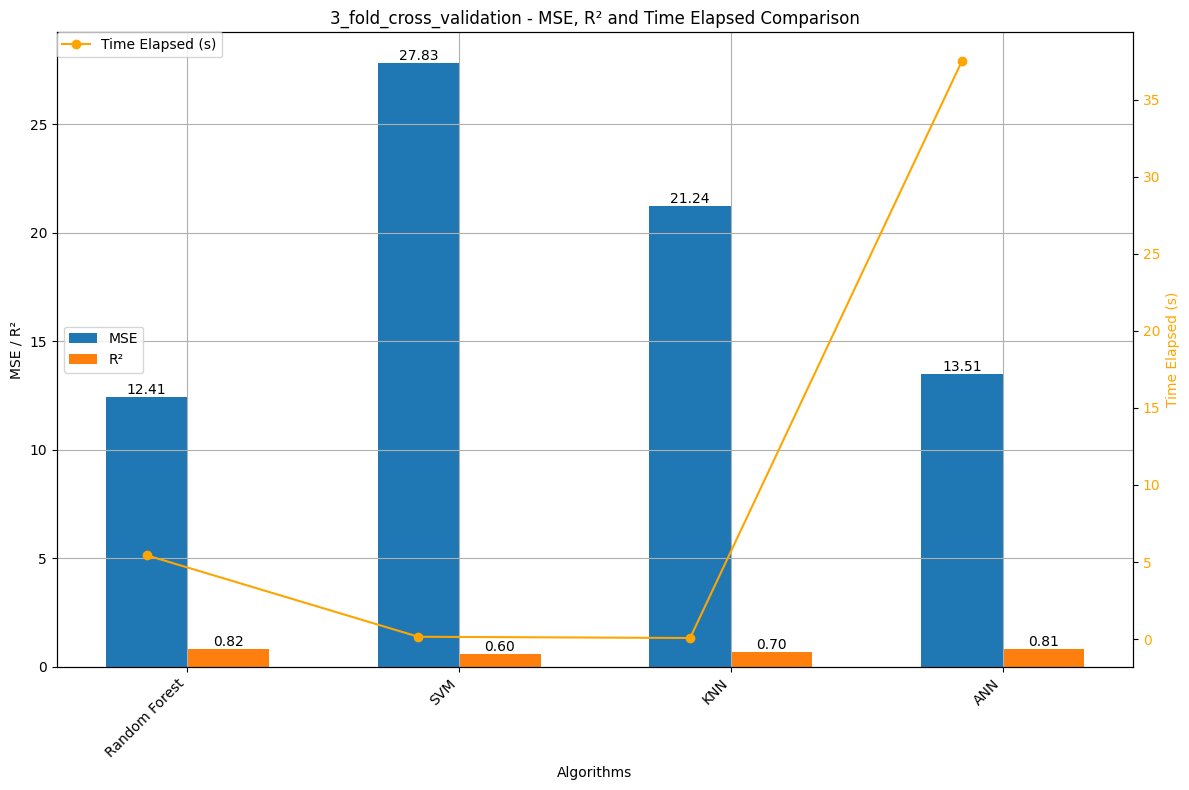

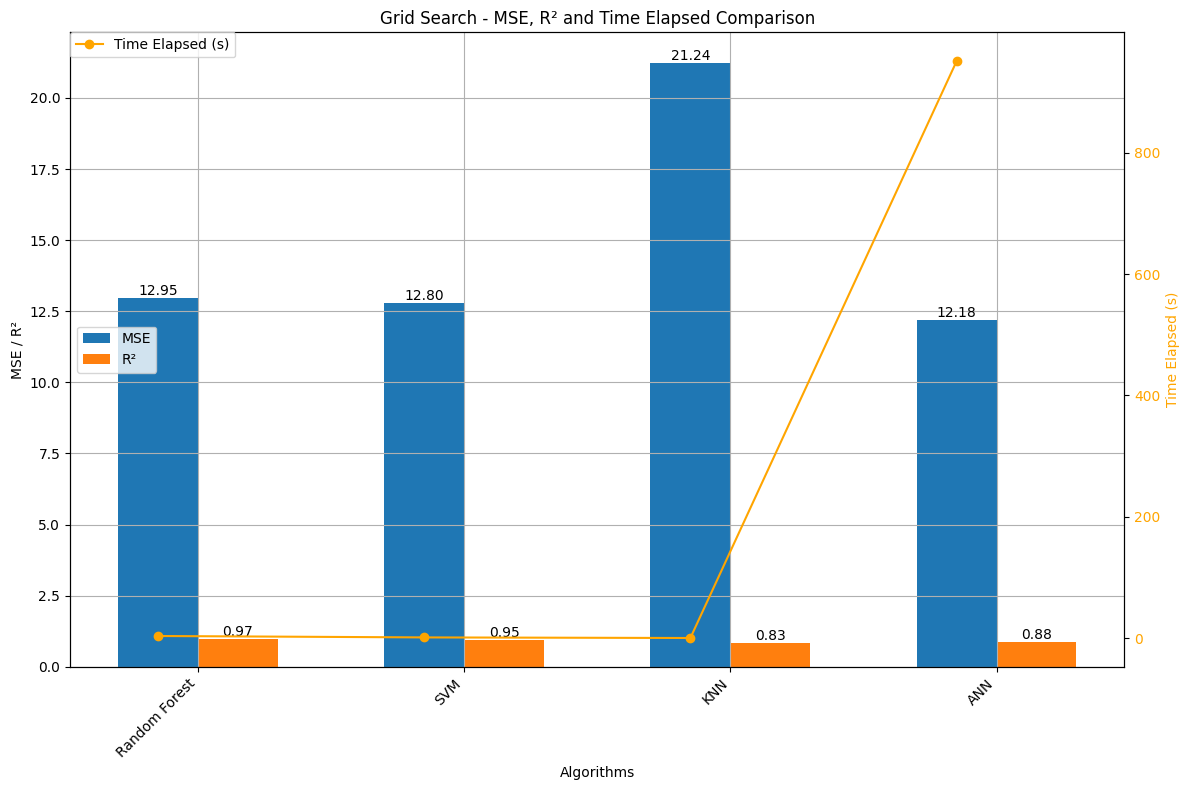

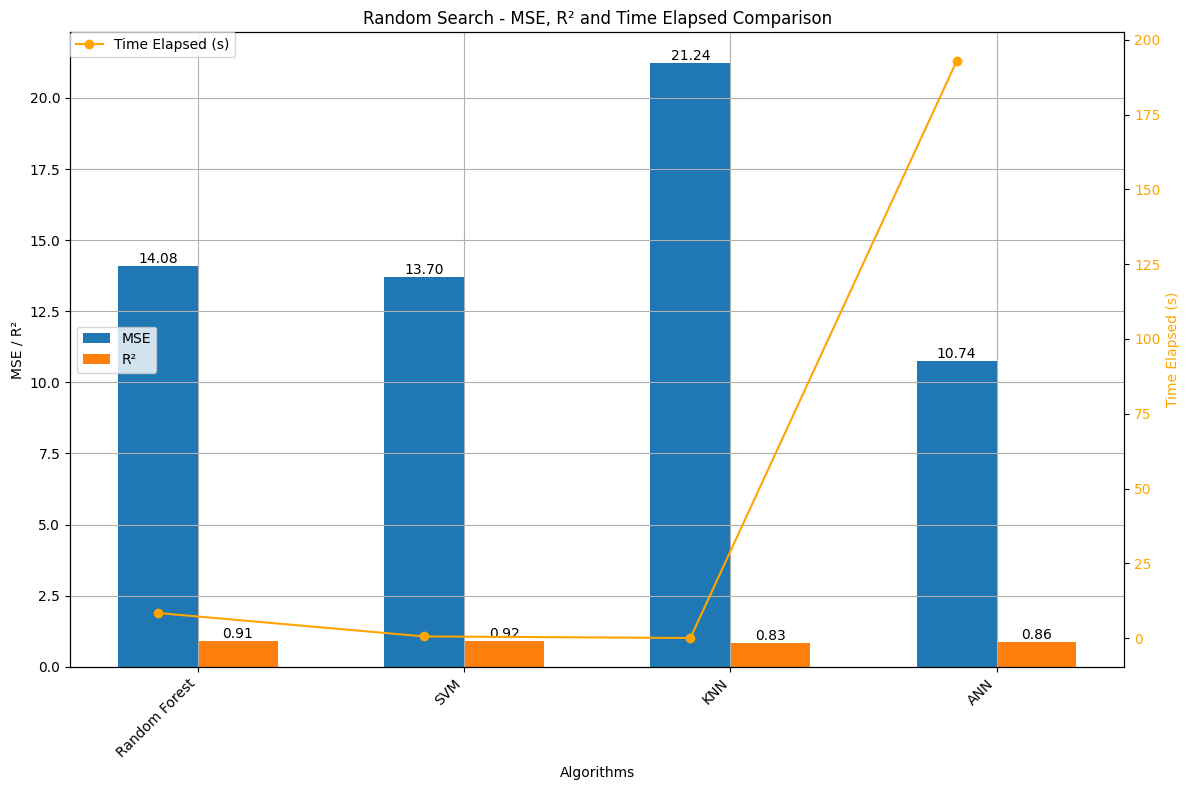

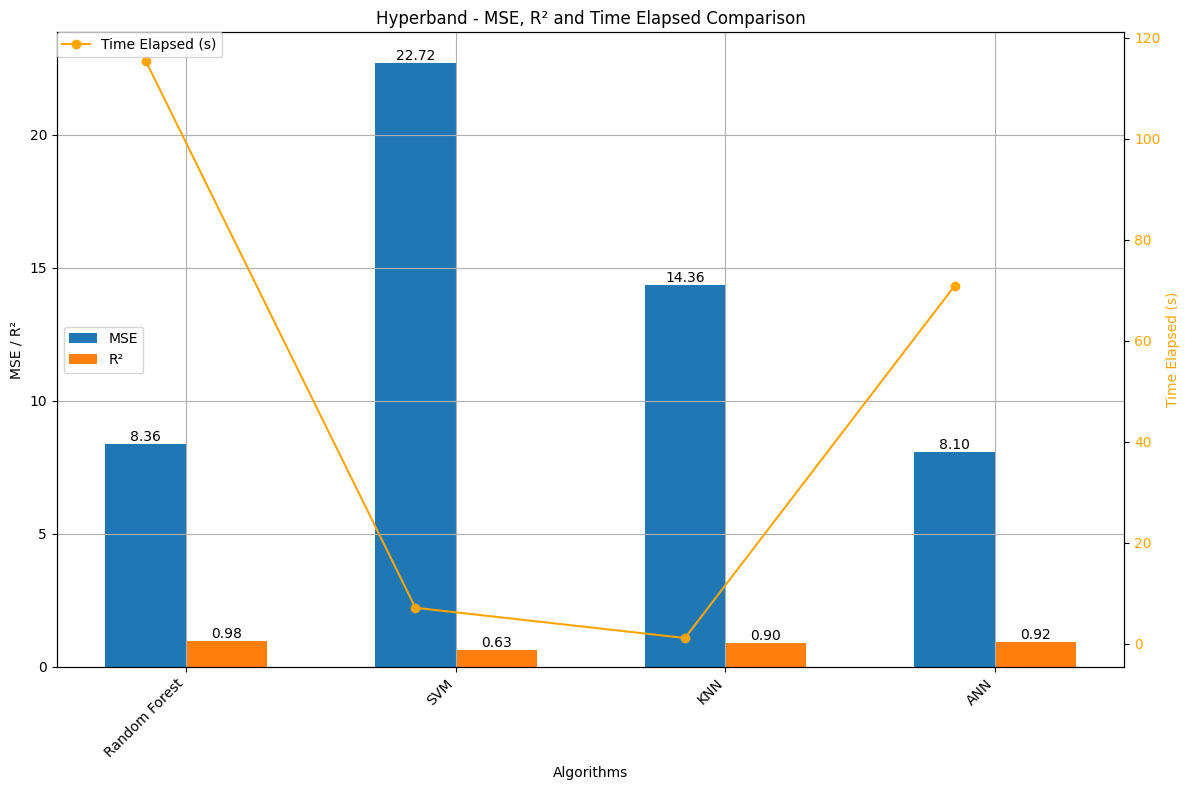

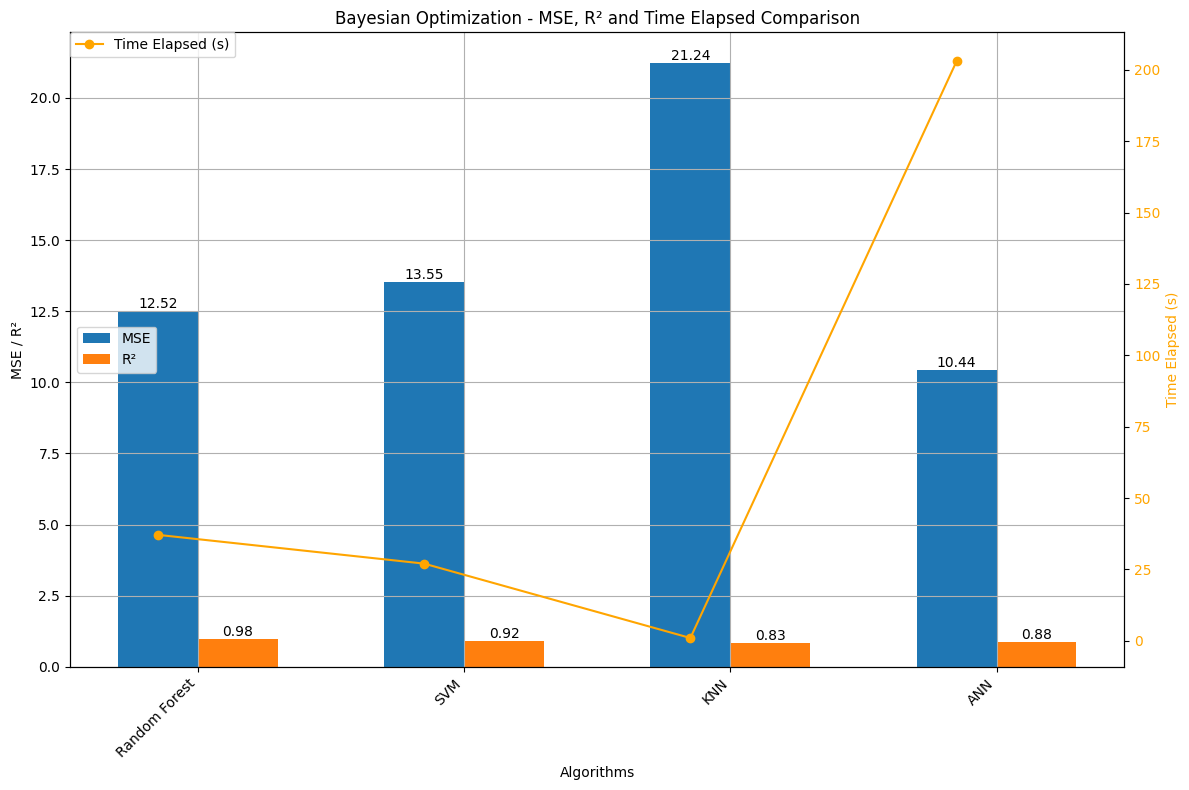

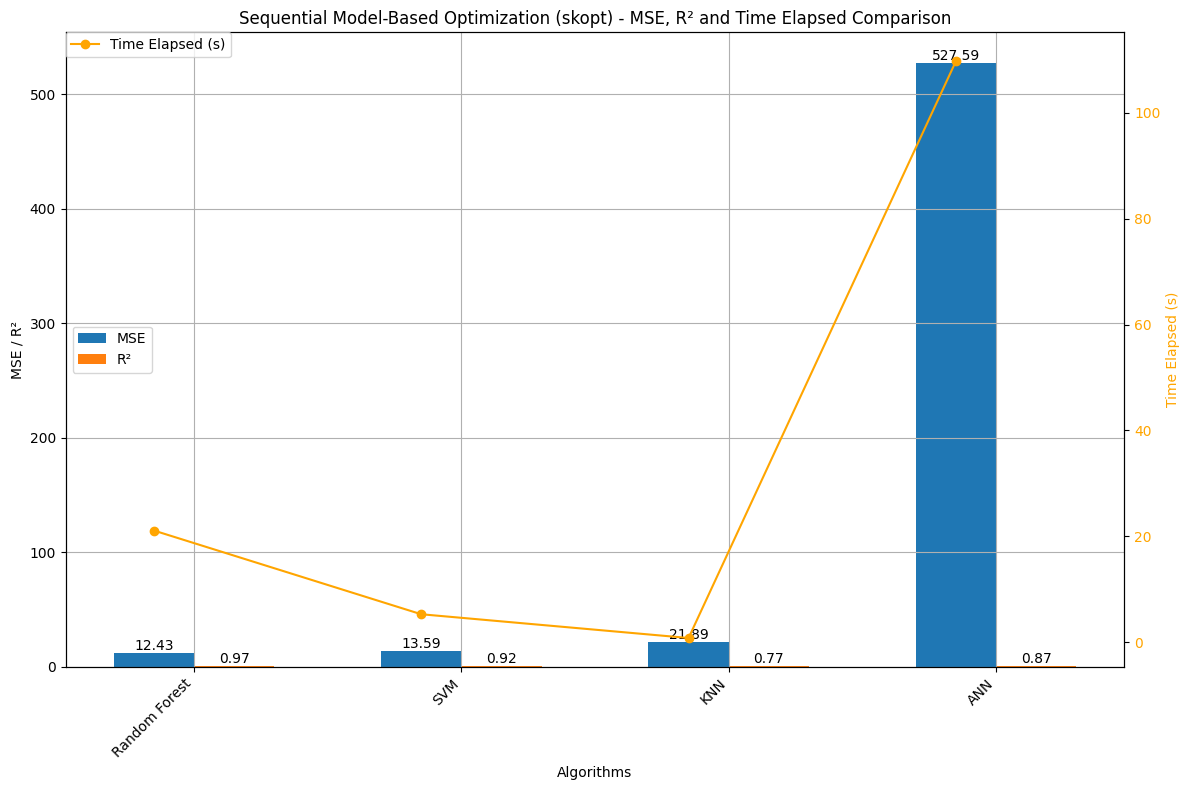

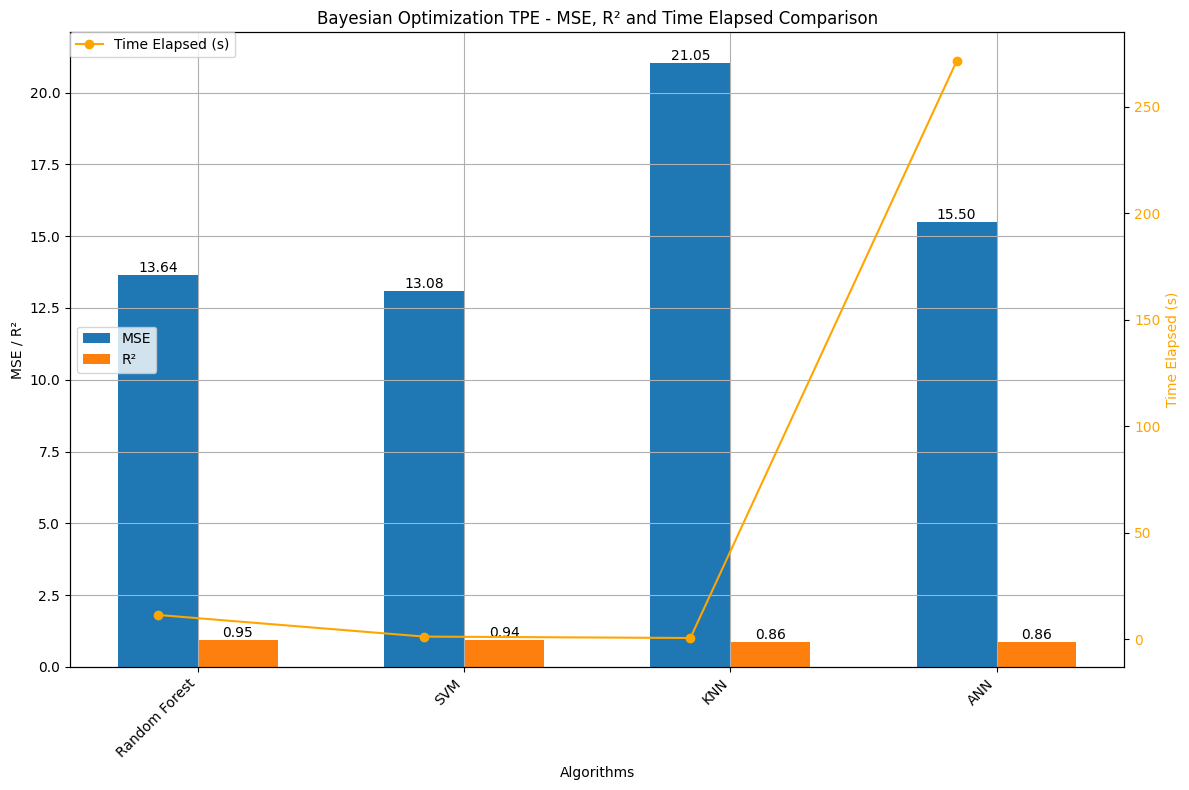

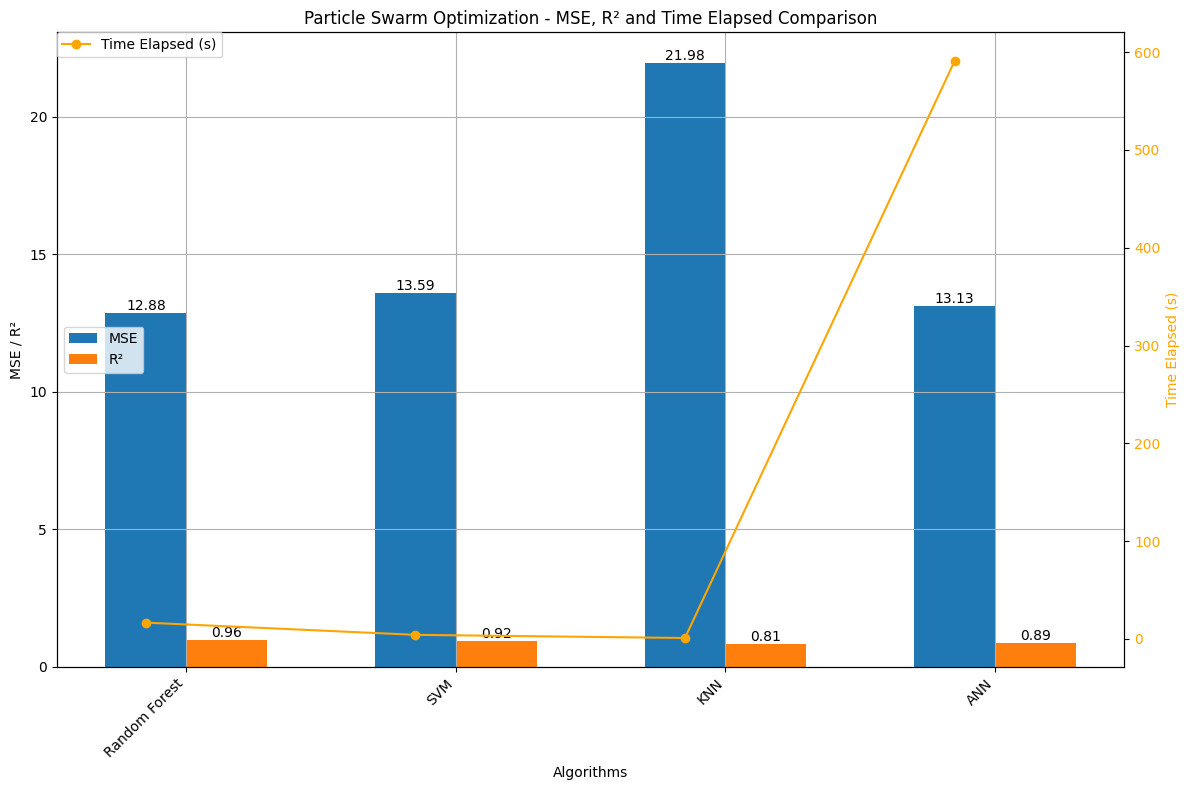

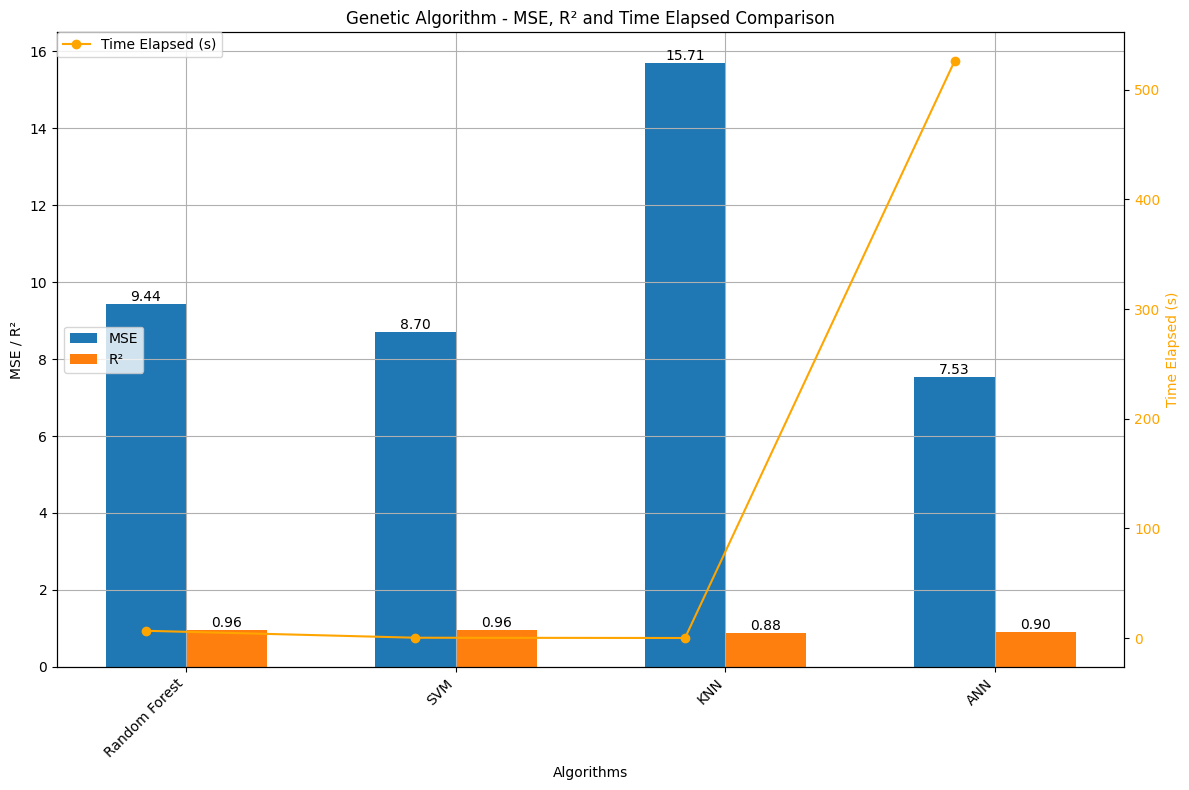

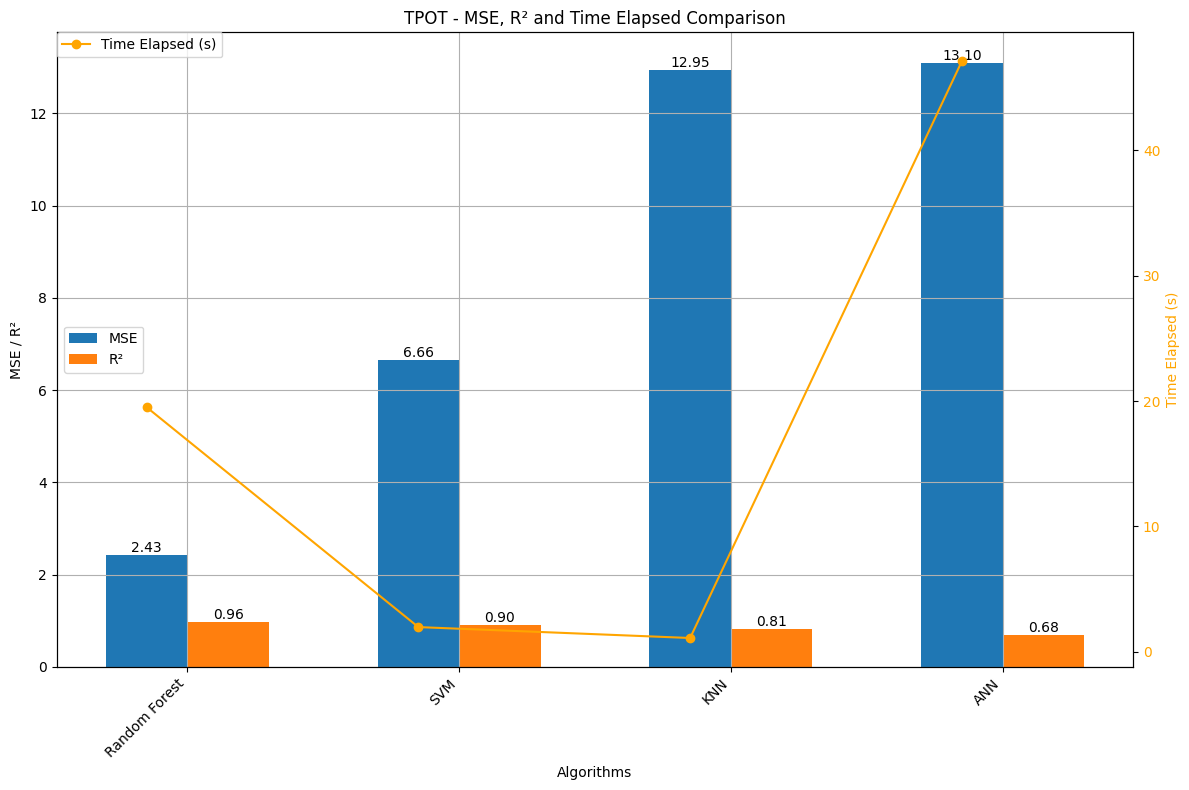

In [ ]:
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza i dati per il grafico
plot_data = {}
metrics = ['MSE', 'R²']

# Popola i dati per il grafico
for procedure, results_df in all_results.items():
    plot_data[procedure] = {
        'Algorithms': results_df['Algorithm'].tolist(),
        'MSE': results_df['MSE'].tolist(),
        'R²': results_df['R²'].tolist(),
        'Time Elapsed (s)': results_df['Time Elapsed (s)'].tolist()
    }

# Crea i grafici per ogni procedura
for procedure, data in plot_data.items():
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(f'{procedure} - MSE, R² and Time Elapsed Comparison')  # Titolo del grafico

    # Grafico a barre per MSE e R²
    bar_width = 0.3
    index = range(len(data['Algorithms']))

    bars = {}
    for i, metric in enumerate(metrics):
        bars[metric] = ax1.bar([x + i * bar_width for x in index], data[metric], bar_width, label=metric)

    ax1.set_xlabel('Algorithms')
    ax1.set_ylabel('MSE / R²')
    ax1.set_xticks([x + (len(metrics) - 1) * bar_width / 2 for x in index])
    ax1.set_xticklabels(data['Algorithms'], rotation=45, ha='right')

    # Aggiungi etichette per i valori sui bar
    for metric, bar in bars.items():
        for b, value in zip(bar, data[metric]):
            height = b.get_height()
            ax1.text(b.get_x() + b.get_width() / 2, height, '{:.2f}'.format(value), ha='center', va='bottom')

    # Grafico a linee per il tempo
    ax2 = ax1.twinx()
    ax2.plot(data['Algorithms'], data['Time Elapsed (s)'], marker='o', color='orange', label='Time Elapsed (s)')
    ax2.set_ylabel('Time Elapsed (s)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Aggiungi le legende
    ax1.legend(loc='center left', bbox_to_anchor=(0, 0.5), prop={'size': 10})  # Legenda per MSE e R²
    ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0., prop={'size': 10})  # Legenda per il tempo

    ax1.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza i dati per il grafico
plot_data = {}
metrics = ['MSE', 'R²']

# Popola i dati per il grafico
for procedure, results_df in all_results.items():
    plot_data[procedure] = {
        'Algorithms': results_df['Algorithm'].tolist(),
        'MSE': results_df['MSE'].tolist(),
        'R²': results_df['R²'].tolist(),
        'Time Elapsed (s)': results_df['Time Elapsed (s)'].tolist()
    }

# Inizializza le strutture per le tabelle
winners_table = []
overall_winner_table = []

# Trova il procedimento complessivo con il miglior R² massimo
overall_best_r2_proc = max(all_results, key=lambda x: all_results[x]['R²'].max())

# Popola le tabelle dei vincitori
for procedure, results_df in all_results.items():
    row = [procedure]

    for metric in metrics:
        if metric == 'MSE':
            best_index = results_df[metric].idxmin()
        else:
            best_index = results_df[metric].idxmax()

        best_algorithm = results_df.loc[best_index, 'Algorithm']
        best_value = results_df.loc[results_df['Algorithm'] == best_algorithm, metric].values[0]
        row.append(best_algorithm)
        row.append(best_value)

    time_winner = results_df.loc[results_df['Time Elapsed (s)'].idxmin(), 'Algorithm']
    time_value = results_df.loc[results_df['Algorithm'] == time_winner, 'Time Elapsed (s)'].values[0]
    row.extend([time_winner, time_value])

    winners_table.append(row)

    if procedure == overall_best_r2_proc:
        overall_winner_table.append(row)

# Definisci le intestazioni delle colonne per le tabelle
headers = ["Procedure", "MSE Winner", "MSE Value", "R² Winner", "R² Value", "Time Winner", "Time Elapsed (s)"]

# Specifica il percorso del file PDF in cui salvare i vincitori
pdf_file_path = "Overall_Results_Regression.pdf"

# Crea un oggetto PdfPages per gestire il file PDF
with PdfPages(pdf_file_path) as pdf:
    # Aggiungi i grafici al PDF
    for procedure, data in plot_data.items():
        fig, ax1 = plt.subplots(figsize=(12, 8))
        plt.title(f'{procedure} - MSE, R² and Time Elapsed Comparison')  # Titolo del grafico

        # Grafico a barre per MSE e R²
        bar_width = 0.3
        index = range(len(data['Algorithms']))

        bars = {}
        for i, metric in enumerate(metrics):
            bars[metric] = ax1.bar([x + i * bar_width for x in index], data[metric], bar_width, label=metric)

        ax1.set_xlabel('Algorithms')
        ax1.set_ylabel('MSE / R²')
        ax1.set_xticks([x + (len(metrics) - 1) * bar_width / 2 for x in index])
        ax1.set_xticklabels(data['Algorithms'], rotation=45, ha='right')

        # Aggiungi etichette per i valori sui bar
        for metric, bar in bars.items():
            for b, value in zip(bar, data[metric]):
                height = b.get_height()
                ax1.text(b.get_x() + b.get_width() / 2, height, '{:.2f}'.format(value), ha='center', va='bottom')

        # Grafico a linee per il tempo
        ax2 = ax1.twinx()
        ax2.plot(data['Algorithms'], data['Time Elapsed (s)'], marker='o', color='orange', label='Time Elapsed (s)')
        ax2.set_ylabel('Time Elapsed (s)', color='orange')
        ax2.tick_params(axis='y', labelcolor='orange')

        # Aggiungi le legende
        ax1.legend(loc='center left', bbox_to_anchor=(0, 0.5), prop={'size': 10})  # Legenda per MSE e R²
        ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0., prop={'size': 10})  # Legenda per il tempo

        ax1.grid(True)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # Aggiungi la tabella "Best algorithm and procedure Summary"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Best Algorithm and Procedure Summary:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=winners_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1.5, 1.8)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

    # Aggiungi la tabella "Overall Best Algorithm and Procedure"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Overall Best Algorithm and Procedure:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=overall_winner_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1.5, 1.8)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

print(f"Le tabelle degli Overall Results sono state aggiunte al file PDF: {pdf_file_path}")

Le tabelle degli Overall Results sono state aggiunte al file PDF: Overall_Results_Regression.pdf
